<a href="https://colab.research.google.com/github/MohebZandi/Deep_Learning_NLP/blob/main/Book_Deep_Learning_NLP_Jason_Brownlee_2020_Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Book_Deep_Learning_NLP_Jason Brownlee_2020**

# Section One: Bag of Words, First models of Neural Network and word Embeding
Jason Brownlee
2020

# Part II - Foundations
### Foundations






#### Chapter 1
#### Natural Language Processing

What natural language is and how it is different from other types of data.

What makes working with natural language so challenging.

Where the field of NLP came from and how it is defined by modern practitioners.


#### Chapter 2
#### Deep Learning

-  The motivation for exploring and adopting large neural network models.
-  The perspective on deep learning as hierarchical feature learning.
-  The promise of scalability of deep learning with the size of data.



#### Chapter 3
#### Promise of Deep Learning for Natural Language

1- The Promise of Drop-in Replacement Models. That is, deep learning methods can
be dropped into existing natural language systems as replacement models that can achieve
commensurate or better performance.

2- The Promise of New NLP Models. That is, deep learning methods offer the op-
portunity of new modeling approaches to challenging natural language problems like
sequence-to-sequence prediction.

3- The Promise of Feature Learning. That is, that deep learning methods can learn
the features from natural language required by the model, rather than requiring that the
features be specified and extracted by an expert.

4- The Promise of Continued Improvement. That is, that the performance of deep
learning in natural language processing is based on real results and that the improvements
appear to be continuing and perhaps speeding up.

5- The Promise of End-to-End Models. That is, that large end-to-end deep learning
models can be fit on natural language problems offering a more general and better-
performing approach.

#### Chapter 4
#### How to Develop Deep Learning Models With Keras

Keras Model Life-Cycle

Below is an overview of the 5 steps in the neural network model life-cycle in Keras:
1. Define Network.
2. Compile Network.
3. Fit Network.
4. Evaluate Network.
5. Make Predictions.



In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

from keras.layers import LSTM, Bidirectional, Dense, Activation
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam,Nadam, SGD


In [ ]:
# Step 1: Define Network

model = Sequential()
model.add(Dense(2))

# or

layers = [Dense(2)]
model = Sequential(layers)

In [ ]:
# For example, a small Multilayer Perceptron model
# with 2 inputs in the visible layer, 5 neurons in the hidden layer and one neuron in the output
# layer can be defined as:

model = Sequential()
model.add(Dense(5, input_dim=2))
model.add(Dense(1))


In [ ]:
# activation functions that transform a summed signal from each neuron in a layer can be extracted and
# added to the Sequential as a layer-like object called the Activation class.

model = Sequential()
model.add(Dense(5, input_dim=2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

The choice of Activation function is most important for the output layer as it will define the format that predictions will take. 

For example, below are some common predictive modeling
problem types and the structure and standard activation function that you can use in the output

layer:
1- Regression: Linear activation function, or *linear*, and the number of neurons matching
the number of outputs.

2- Binary Classification (2 class): Logistic activation function, or *sigmoid*, and one
neuron the output layer.

3- Multiclass Classification (>2 class): Softmax activation function, or *softmax*, and
one output neuron per class value, assuming a one hot encoded output pattern.

In [ ]:
# Step 1: Compile Network

# Example of compiling a defined model.
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
# Alternately, the optimizer can be created and configured before being provided as an argument
# to the compilation step.

algorithm = SGD(lr=0.1, momentum=0.3)
model.compile(optimizer=algorithm, loss='mean_squared_error')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Below are some standard loss functions for different predictive
model types:

- Regression: Mean Squared Error or *mean_squared_error*.

- Binary Classification (2 class): Logarithmic Loss, also called cross-entropy or
*binary_crossentropy*.

- Multiclass Classification (>2 class): Multiclass Logarithmic Loss or *categorical_crossentropy*.

The most common optimization algorithm is *stochastic gradient descent(sgd)*, but Keras also
supports a suite of other state-of-the-art optimization algorithms that work well with little or
no configuration. Perhaps the most commonly used optimization algorithms because of their
generally better performance are:

- Stochastic Gradient Descent, or *sgd*, that requires the tuning of a learning rate and
momentum.

- Adam, or *adam*, that requires the tuning of learning rate.

- RMSprop, or *rmsprop*, that requires the tuning of learning rate.

In [ ]:
# Generally, the most useful additional metric to collect is accuracy for classification
# problems. The metrics to collect are specified by name in an array. For example:

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

## Step 3. Fit Network

Once the network is compiled, it can be fit, which means adapt the weights on a training dataset.

Fitting the network requires the training data to be specified, both a matrix of input patterns, X,
and an array of matching output patterns, y.

**Example of fitting a compiled model.**

history = model.fit(X, y, batch_size=10, epochs=100)

#

#

Once fit, a history object is returned that provides a summary of the performance of the
model during training. 

This includes both the loss and any additional metrics specified when
compiling the model, recorded each epoch.

You can reduce the amount of information displayed to just the
loss each epoch by setting the verbose argument to 2. 

You can turn off all output by setting
verbose to 0. For example:

#

history = model.fit(X, y, batch_size=10, epochs=100, verbose=0)

## **Step 4. Evaluate Network**

The model evaluates the loss across all of the test patterns, as well as any other metrics
specified when the model was compiled, like classification accuracy. 

A list of evaluation metrics
is returned. 

For example, for a model compiled with the accuracy metric, we could evaluate it
on a new dataset as follows:

loss, accuracy = model.evaluate(X, y)

#

#

Turn off verbose:

loss, accuracy = model.evaluate(X, y, verbose=0)

## **Step 5. Make Predictions**

Once we are satisfied with the performance of our fit model, we can use it to make predictions
on new data. 

This is as easy as calling the *predict()* function on the model with an array of
new input patterns. 

For example:

predictions = model.predict(X)


The predictions will be returned in the format provided by the output layer of the network.

- In the case of a regression problem, these predictions may be in the format of the problem
directly, provided by a linear activation function. 

- For a binary classification problem, the
predictions may be an array of probabilities for the first class that can be converted to a 1 or 0
by rounding.

- For a multiclass classification problem, the results may be in the form of an array of
probabilities (assuming a one hot encoded output variable) that may need to be converted to a
single class output prediction using the *argmax()* NumPy function. 

Alternately, for classification
problems, we can use the *predict_classes()* function that will automatically convert uncrisp
predictions to crisp integer class values.

predictions = model.predict_classes(X)

## Standard Network Models

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 20)                220       
                                                                 
 dense_8 (Dense)             (None, 10)                210       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


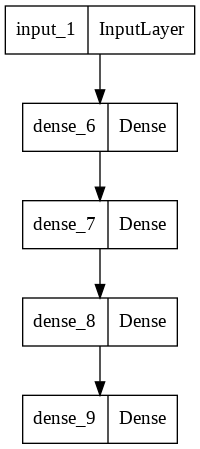

In [ ]:
# Multilayer Perceptron
from tensorflow.keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
# summarize layers
model.summary()
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 61, 61, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 16)        8208      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 dense (Dense)               (None, 13, 13, 10)        170   

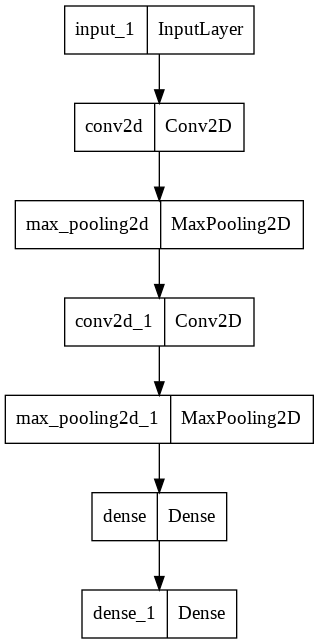

In [ ]:
# Convolutional Neural Network (CNN)
from tensorflow.keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
visible = Input(shape=(64,64,1))
conv1 = Conv2D(32, (4,4), activation='relu')(visible)
pool1 = MaxPooling2D()(conv1)
conv2 = Conv2D(16, (4,4), activation='relu')(pool1)
pool2 = MaxPooling2D()(conv2)
hidden1 = Dense(10, activation='relu')(pool2)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)
# summarize layers
model.summary()
# plot graph
plot_model(model, to_file='convolutional_neural_network.png')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 1)]          0         
                                                                 
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


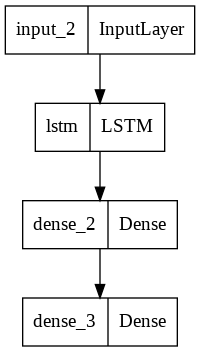

In [ ]:
# Recurrent Neural Network (RNN)
from tensorflow.keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.recurrent import LSTM
visible = Input(shape=(100,1))
hidden1 = LSTM(10)(visible)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)
# summarize layers
model.summary()
# plot graph
plot_model(model, to_file='recurrent_neural_network.png')

# Part III - Data Preparation
### Data Preparation


- How to Clean Text Manually and with NLTK

- How to Prepare Text Data with scikit-learn

- How to Prepare Text Data With Keras

### How to Clean Text Manually and with NLTK

Text Cleaning Is Task Specific

Take a moment to look at the text. What do you notice? Here's what I see:

- It's plain text so there is no markup to parse (yay!).
- The translation of the original German uses UK English (e.g. travelling).
- The lines are artificially wrapped with new lines at about 70 characters (meh)
- There are no obvious typos or spelling mistakes.
- There's punctuation like commas, apostrophes, quotes, question marks, and more.
- There's hyphenated descriptions like armour-like.
- There's a lot of use of the em dash (-) to continue sentences (maybe replace with commas?).
- There are names (e.g. Mr. Samsa)
- There does not appear to be numbers that require handling (e.g. 1999)
- There are section markers (e.g. II and III ).

In [ ]:
# Manual Tokenization

# Split by Whitespace

from google.colab import files

uploaded = files.upload()

Saving metamorphosis_clean.txt to metamorphosis_clean.txt


In [ ]:
# load text
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()

file.close()
# split into words by white space
words = text.split()
print(words[:100])

['\ufeffOne', 'morning,', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin.', 'He', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections.', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment.', 'His', 'many', 'legs,', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him,', 'waved', 'about', 'helplessly', 'as', 'he', 'looked.', '"What\'s', 'happened', 'to', 'me?"', 'he', 'thought.', 'It', "wasn't", 'a', 'dream.', 'His', 'room,', 'a', 'proper', 'human']


In [ ]:
# Select Words

# Another approach might be to use the regex model (re) and split the document into words by
# selecting for strings of alphanumeric characters (a-z, A-Z, 0-9 and ` '). For example:

import re
# load text
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split based on words only
words = re.split(r'\W+', text)
print(words[:100])

['', 'One', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'armour', 'like', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'His', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'What', 's', 'happened', 'to', 'me', 'he', 'thought', 'It', 'wasn', 't', 'a', 'dream', 'His']


In [ ]:
# Split by Whitespace and Remove Punctuation

import string

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# We can use regular expressions to select for the punctuation characters and use the sub()
# function to replace them with nothing. For example:

re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
stripped = [re_punc.sub('', w) for w in words]

In [ ]:
# We can put all of this together, load the text file, split it into words by white space, then
# translate each word to remove the punctuation.

import string
import re
# load text
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words by white space
words = text.split()
# prepare regex for char filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
stripped = [re_punc.sub('', w) for w in words]
print(stripped[:100])

['\ufeffOne', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'armourlike', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'His', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'Whats', 'happened', 'to', 'me', 'he', 'thought', 'It', 'wasnt', 'a', 'dream', 'His', 'room', 'a', 'proper', 'human']


In [ ]:
# Sometimes text data may contain non-printable characters.

re_print = re.compile('[^%s]' % re.escape(string.printable))
result = [re_print.sub('', w) for w in words]
print(result[:100])

['One', 'morning,', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin.', 'He', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections.', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment.', 'His', 'many', 'legs,', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him,', 'waved', 'about', 'helplessly', 'as', 'he', 'looked.', '"What\'s', 'happened', 'to', 'me?"', 'he', 'thought.', 'It', "wasn't", 'a', 'dream.', 'His', 'room,', 'a', 'proper', 'human']


In [ ]:
# Normalizing Case

# We can convert all words to lowercase by calling the lower() function on each
# word. For example:

words = text.split()
# convert to lower case
words = [word.lower() for word in words]
print(words[:100])

['\ufeffone', 'morning,', 'when', 'gregor', 'samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin.', 'he', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections.', 'the', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment.', 'his', 'many', 'legs,', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him,', 'waved', 'about', 'helplessly', 'as', 'he', 'looked.', '"what\'s', 'happened', 'to', 'me?"', 'he', 'thought.', 'it', "wasn't", 'a', 'dream.', 'his', 'room,', 'a', 'proper', 'human']


### Tokenization and Cleaning with NLTK

In [ ]:
import nltk
# nltk.download()

In [ ]:
# NLTK script to split text into sentences.


# nltk.download('punkt')
from nltk import sent_tokenize
# load data
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into sentences
sentences = sent_tokenize(text)
print(sentences[0])

﻿One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.


In [ ]:
# NLTK script to split text into words.

from nltk.tokenize import word_tokenize
# load data
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
tokens = word_tokenize(text)
print(tokens[:100])

['\ufeffOne', 'morning', ',', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', ',', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', '.', 'He', 'lay', 'on', 'his', 'armour-like', 'back', ',', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', ',', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', '.', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', '.', 'His', 'many', 'legs', ',', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', ',', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', '.', '``', 'What', "'s", 'happened', 'to']


In [ ]:
# NLTK script to remove punctuation.


from nltk.tokenize import word_tokenize
# load data
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
tokens = word_tokenize(text)
# remove all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]
print(words[:100])

['morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'His', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'What', 'happened', 'to', 'me', 'he', 'thought', 'It', 'was', 'a', 'dream', 'His', 'room', 'a', 'proper', 'human', 'room', 'although']


In [ ]:
# Filter out Stop Words (and Pipeline)


nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)
print(len(stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

Stop Words:

You can see that they are all lower case and have punctuation removed. 

You could compare
your tokens to the stop words and filter them out, but you must ensure that your text is prepared
the same way. 

Let's demonstrate this with a small pipeline of text preparation including:
-  Load the raw text.
-  Split into tokens.
-  Convert to lowercase.
-  Remove punctuation from each token.
-  Filter out remaining tokens that are not alphabetic.
-  Filter out tokens that are stop words.

In [ ]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# load data
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
tokens = word_tokenize(text)
# convert to lower case
tokens = [w.lower() for w in tokens]
# prepare regex for char filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
stripped = [re_punc.sub('', w) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

['morning', 'gregor', 'samsa', 'woke', 'troubled', 'dreams', 'found', 'transformed', 'bed', 'horrible', 'vermin', 'lay', 'armourlike', 'back', 'lifted', 'head', 'little', 'could', 'see', 'brown', 'belly', 'slightly', 'domed', 'divided', 'arches', 'stiff', 'sections', 'bedding', 'hardly', 'able', 'cover', 'seemed', 'ready', 'slide', 'moment', 'many', 'legs', 'pitifully', 'thin', 'compared', 'size', 'rest', 'waved', 'helplessly', 'looked', 'happened', 'thought', 'nt', 'dream', 'room', 'proper', 'human', 'room', 'although', 'little', 'small', 'lay', 'peacefully', 'four', 'familiar', 'walls', 'collection', 'textile', 'samples', 'lay', 'spread', 'table', 'samsa', 'travelling', 'salesman', 'hung', 'picture', 'recently', 'cut', 'illustrated', 'magazine', 'housed', 'nice', 'gilded', 'frame', 'showed', 'lady', 'fitted', 'fur', 'hat', 'fur', 'boa', 'sat', 'upright', 'raising', 'heavy', 'fur', 'muff', 'covered', 'whole', 'lower', 'arm', 'towards', 'viewer', 'gregor']


Running this example, we can see that in addition to all of the other transforms, stop words
like a and to have been removed. I note that we are still left with tokens like *nt*. The rabbit
hole is deep; there's always more we can do.

Stem Words

Stemming refers to the process of reducing each word to its root or base. For example *fishing,
fished, fisher* all reduce to the stem **fish**.

There are many stemming algorithms,
although a popular and long-standing method is the *Porter Stemming* algorithm. This method
is available in NLTK via the *PorterStemmer* class.

In [ ]:
# NLTK script stem words.
# the stemming implementation has also reduced
# the tokens to lowercase, likely for internal look-ups in word tables.


from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
# load data
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
tokens = word_tokenize(text)
# stemming of words
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in tokens]
print(stemmed[:100])

['\ufeffone', 'morn', ',', 'when', 'gregor', 'samsa', 'woke', 'from', 'troubl', 'dream', ',', 'he', 'found', 'himself', 'transform', 'in', 'hi', 'bed', 'into', 'a', 'horribl', 'vermin', '.', 'He', 'lay', 'on', 'hi', 'armour-lik', 'back', ',', 'and', 'if', 'he', 'lift', 'hi', 'head', 'a', 'littl', 'he', 'could', 'see', 'hi', 'brown', 'belli', ',', 'slightli', 'dome', 'and', 'divid', 'by', 'arch', 'into', 'stiff', 'section', '.', 'the', 'bed', 'wa', 'hardli', 'abl', 'to', 'cover', 'it', 'and', 'seem', 'readi', 'to', 'slide', 'off', 'ani', 'moment', '.', 'hi', 'mani', 'leg', ',', 'piti', 'thin', 'compar', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', ',', 'wave', 'about', 'helplessli', 'as', 'he', 'look', '.', '``', 'what', "'s", 'happen', 'to']


Additional Text Cleaning Considerations

Here is a shortlist of additional considerations when cleaning text:
-  Handling large documents and large collections of text documents that do not fit into
memory.
-  Extracting text from markup like HTML, PDF, or other structured document formats.
-  Transliteration of characters from other languages into English.
-  Decoding Unicode characters into a normalized form, such as UTF8.
-  Handling of domain specific words, phrases, and acronyms.
-  Handling or removing numbers, such as dates and amounts.
-  Locating and correcting common typos and misspellings.

### How to Prepare Text Data with scikit-learn

After completing this tutorial, you will know:
-  How to convert text to word count vectors with *CountVectorizer.*
-  How to convert text to word frequency vectors with *TfidfVectorizer.*
-  How to convert text to unique integers with *HashingVectorizer.*

The Bag-of-Words Model

The model is simple in that it throws away all of the order
information in the words and focuses on the occurrence of words in a document.

This can be done by assigning each word a unique number.

Then any document we see can be encoded
as a fixed-length vector with the length of the vocabulary of known words. 

The value in each position in the vector could be filled with a count or frequency of each word in the encoded
document.

The scikit-learn library provides 3 different schemes that we can use, and we will briefly look at each.

- Word Counts with **CountVectorizer**

The CountVectorizer provides a simple way to both tokenize a collection of text documents
and build a vocabulary of known words, but also to encode new documents using that vocabulary.

An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document. 

Because these vectors will
contain a lot of zeros, we call them sparse. Python provides an efficient way of handling sparse vectors in the scipy.sparse package. 

The vectors returned from a call to transform() will
be sparse vectors, and you can transform them back to NumPy arrays to look and better understand what is going on by calling the toarray() function. 

Below is an example of using
the CountVectorizer to tokenize, build a vocabulary, and then encode a document.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print('\nshape of the encoded document: ',vector.shape)
print(type(vector))
print()
print('sparse vector:\n',vector)
print()
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}

shape of the encoded document:  (1, 8)
<class 'scipy.sparse.csr.csr_matrix'>

sparse vector:
   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	2

[[1 1 1 1 1 1 1 2]]


In [ ]:
# Importantly, the same vectorizer can be used on documents that contain words not included
# in the vocabulary.


# encode another document
text2 = ["the puppy"]
vector = vectorizer.transform(text2)
print(vector.toarray())


# The encoded vectors can then be used directly with a machine learning algorithm.

[[0 0 0 0 0 0 0 1]]


- **Word Frequencies with TfidfVectorizer**

Without going into the math, TF-IDF are word frequency scores that try to highlight
words that are more interesting, e.g. frequent in a document but not across documents.

- Term Frequency (tf): This summarizes how often a given word appears within a document.
- Inverse Document Frequency (idf): This downscales words that appear a lot across documents.

The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents.

Alternately, if you already have a
learned *CountVectorizer*, you can use it with a **TfidfTransformer** to just calculate the inverse
document frequencies and start encoding documents.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
"The dog.",
"The fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print('\ntf_idf vector:\n',vectorizer.idf_)

# encode document, the first text
vector = vectorizer.transform([text[0]])

# summarize encoded vector
print('\nvector shape: ', vector.shape)
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}

tf_idf vector:
 [1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]

vector shape:  (1, 8)
[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]


- Hashing with HashingVectorizer

Counts and frequencies can be very useful, but one limitation of these methods is that the vocabulary can become very large. This, in turn, will require large vectors for encoding
documents and impose large requirements on memory and slow down algorithms. 

A clever work
around is to use a one way hash of words to convert them to integers. 

The clever part is that
no vocabulary is required and you can choose an arbitrary-long fixed length vector.

A downside is that the hash is a one-way function so there is no way to convert the encoding back to a word
(which may not matter for many supervised learning tasks).


The values
of the encoded document correspond to normalized word counts by default in the range of -1 to 1, but could be made simple integer counts by changing the default configuration.

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = HashingVectorizer(n_features=20)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(1, 20)
[[ 0.          0.          0.          0.          0.          0.33333333
   0.         -0.33333333  0.33333333  0.          0.          0.33333333
   0.          0.          0.         -0.33333333  0.          0.
  -0.66666667  0.        ]]


### How to Prepare Text Data With Keras

The Keras deep learning library provides some basic tools to help you
prepare your text data. 

In this tutorial, you will discover how you can use Keras to prepare
your text data.

- About the convenience methods that you can use to quickly prepare text data.
- The Tokenizer API that can be fit on training data and used to encode training, validation,
and test documents.
- The range of 4 different document encoding schemes offered by the Tokenizer API.

**Split Words with text to word sequence**

Keras provides the
text to word sequence() function that you can use to split text into a list of words. 

By default, this function automatically does 3 things:

- Splits words by space.
- Filters out punctuation.
- Converts text to lowercase (lower=True).

You can change any of these defaults by passing arguments to the function.



In [ ]:
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# tokenize the document
result = text_to_word_sequence(text)
print(result)

['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']


**Encoding with one hot**

In addition to the text, the vocabulary size (total words) must be specified. 

This could be the
total number of words in the document or more if you intend to encode additional documents
that contains additional words.

We can use the text to word sequence() function from the previous section to split the
document into words and then use a set to represent only the unique words in the document.

In [ ]:
# Note: Given the stochastic nature of neural networks, your specific results may vary. Consider
# running the example a few times.

# Example of one hot encoding.

from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)
# integer encode the document
result = one_hot(text, round(vocab_size*1.3))
print(result)

8
[7, 7, 8, 5, 8, 7, 7, 8, 4]


**Hash Encoding with hashing trick**

A limitation of integer and count base encodings is that they must maintain a vocabulary of
words and their mapping to integers. 

An alternative to this approach is to use a one-way hash
function to convert words to integers. 

This avoids the need to keep track of a vocabulary, which
is faster and requires less memory.



In [ ]:
# Example of hash encoding.

from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)
# integer encode the document
result = hashing_trick(text, round(vocab_size*1.3), hash_function='md5')
print(result)

8
[6, 4, 1, 2, 7, 5, 6, 2, 6]


**Tokenizer API**


Keras provides a more sophisticated API for preparing text that can be fit and reused to prepare multiple text documents.

This may be the preferred approach for large projects. 

Keras provides
the Tokenizer class for preparing text documents for deep learning. 

The Tokenizer must be constructed and then fit on either raw text documents or integer encoded text documents.



In [ ]:
from keras.preprocessing.text import Tokenizer
# define 5 documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)

Once fit, the Tokenizer provides 4 attributes that you can use to query what has been
learned about your documents:
- word **counts**: A dictionary mapping of words and their occurrence counts when the Tokenizer was fit.
- word **docs**: A dictionary mapping of words and the number of documents that each appears in.
- word **index**: A dictionary of words and their uniquely assigned integers.
- **document count**: A dictionary mapping and the number of documents they appear in calculated during the fit.

In [ ]:
# summarize what was learned
print('word_counts:\n', t.word_counts)
print('\ndocument_count:\n',t.document_count)
print('\n\nword_index:\n',t.word_index)
print('\nword_docs:\n',t.word_docs)

word_counts:
 OrderedDict([('well', 1), ('done', 1), ('good', 1), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])

document_count:
 5


word_index:
 {'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}

word_docs:
 defaultdict(<class 'int'>, {'well': 1, 'done': 1, 'work': 2, 'good': 1, 'great': 1, 'effort': 1, 'nice': 1, 'excellent': 1})


Once the Tokenizer has been fit on training data, it can be used to encode documents in
the train or test datasets. 

The *texts_to_matrix()* function on the *Tokenizer* can be used to
create one vector per document provided per input. 

The length of the vectors is the total size
of the vocabulary. 

This function provides a suite of standard bag-of-words model text encoding
schemes that can be provided via a mode argument to the function.

The modes available include:
- **binary**: Whether or not each word is present in the document. This is the **default**.
- **count**: The count of each word in the document.
- **tfidf**: The Text Frequency-Inverse DocumentFrequency (TF-IDF) scoring for each word in the document.
- **freq**: The frequency of each word as a ratio of words within each document.

**The Tokenizer will be the key way we will prepare text for word embeddings throughout this book.**

In [ ]:
# We can put all of this together with a worked example.

from keras.preprocessing.text import Tokenizer
# define 5 documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)
# summarize what was learned
print('word_counts:\n', t.word_counts)
print('\ndocument_count:\n',t.document_count)
print('\n\nword_index:\n',t.word_index)
print('\nword_docs:\n',t.word_docs)

# integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='count')
print('\n\ntexts_to_matrix:\n',encoded_docs)

word_counts:
 OrderedDict([('well', 1), ('done', 1), ('good', 1), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])

document_count:
 5


word_index:
 {'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}

word_docs:
 defaultdict(<class 'int'>, {'well': 1, 'done': 1, 'work': 2, 'good': 1, 'great': 1, 'effort': 1, 'nice': 1, 'excellent': 1})


texts_to_matrix:
 [[0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Part IV Bag-of-Words

The bag-of-words model is a way of representing text data when modeling text with machine learning algorithms.

In this
tutorial, you will discover the bag-of-words model for feature extraction in natural language
processing. 

After completing this tutorial, you will know:
- What the bag-of-words model is and why it is needed to represent text.
- How to develop a bag-of-words model for a collection of documents.
- How to use different techniques to prepare a vocabulary and score words.

Machine learning algorithms cannot work
with raw text directly; the text must be converted into numbers. 

Specifically, vectors of numbers.

*In language processing, the vectors x are derived from textual data, in order to reflect various linguistic properties of the text.*

This is called feature extraction or feature encoding. 

A popular and simple method of feature extraction with text data is called the bag-of-words model of text.

The approach is very simple and 
flexible, and can be used in a myriad of ways for extracting features from documents. 

A bag-of-words is a representation of text that describes the occurrence of words within a document. 

It involves two things:
- A vocabulary of known words.
- A measure of the presence of known words.

It is called a bag-of-words , because any information about the order or structure of words in the document is discarded. 

The model is only concerned with whether known words **occur** in
the document, **not where** in the document.

*A very common feature extraction procedures for sentences and documents is the bag-of-words approach (BOW). In this approach, we look at the histogram of the
words within the text, i.e. considering each word count as a feature.*

The bag-of-words can be as simple or complex as you like. 

The complexity comes both in deciding how to design
the vocabulary of known words (or tokens) and how to score the presence of known words.



**Example of the Bag-of-Words Model**

Sample of text from A Tale of Two Cities by Charles Dickens.

It was the best of times,

it was the worst of times,

it was the age of wisdom,

it was the age of foolishness,

For this small example, let's treat each line as a separate document and the 4 lines as our entire corpus of documents.

**list of all of the words in our model vocabulary.**
- it
- was
- the
- best
- of
- times
- worst
- age
- wisdom
- foolishness

That is a vocabulary of 10 words from a corpus containing 24 words.

**Create Document Vectors**

Because
we know the vocabulary has 10 words, we can use a fixed-length document representation of 10, with one position in the vector to score each word. 

The simplest scoring method is to mark the
presence of words as a boolean value, 0 for absent, 1 for present.

first document (It was the best of times) and convert it into a binary vector. The scoring of the document would look as follows:

- it = 1
-was = 1
-the = 1
-best = 1
-of = 1
-times = 1
-worst = 0
-age = 0
-wisdom = 0
-foolishness = 0

As a binary vector, this would look as follows:

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

The other three documents would look as follows:

- "it was the worst of times" = [1, 1, 1, 0, 1, 1, 1, 0, 0, 0]
- "it was the age of wisdom" = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]
- "it was the age of foolishness" = [1, 1, 1, 0, 1, 0, 0, 1, 0, 1]

New documents that
overlap with the vocabulary of known words, but may contain words outside of the vocabulary, can still be encoded, where only the **occurrence of known words** are scored and unknown words are ignored.

**Managing Vocabulary**

You can
imagine that for a very large corpus, such as thousands of books, that the length of the vector
might be thousands or millions of positions. Further, each document may contain very few of the known words in the vocabulary.

This results in a vector with lots of zero scores, called a sparse vector or sparse representation.

Sparse vectors require more memory and computational resources when modeling and the vast number of positions or dimensions can make the modeling process very challenging for traditional algorithms. 

As such, there is pressure to decrease the size of the vocabulary when
using a bag-of-words model.

There are simple text cleaning techniques that can be used as a first step, such as:

- Ignoring case.
- Ignoring punctuation.
- Ignoring frequent words that don't contain much information, called **stop words**, like a, of, etc.
- Fixing misspelled words.
- Reducing words to their stem (e.g. play from playing) using stemming algorithms.

-----------------------------------------
A more sophisticated approach is to create a vocabulary of grouped words. This both
changes the scope of the vocabulary and allows the bag-of-words to capture a little bit more
meaning from the document. 

In this approach, each word or token is called a *gram*. 

Creating a vocabulary of *two-word pairs* is, in turn, called a *bigram* model. 

Again, only the bigrams that
appear in the corpus are modeled, not all possible bigrams.

An n-gram is an n-token sequence of words: a 2-gram (more commonly called a
bigram) is a two-word sequence of words like \please turn", \turn your", or \your homework", and a 3-gram (more commonly called a **trigram**) is a three-word sequence of words like \please turn your", or \turn your homework".
- 
Often a simple
bigram approach is better than a 1-gram bag-of-words model for tasks like documentation
classification.

**Scoring Words**


- Word Hashing: 

    Words are hashed deterministically to the same integer index in the target hash space. A binary score or count can then be used to score the word. 

    This is called the hash trick or feature
    hashing. 

    The challenge is to choose a hash space to accommodate the chosen vocabulary size to minimize the probability of collisions and trade-of sparsity.

- TF-IDF
    
    **Term Frequency (TF)**: is a scoring of the frequency of the word in the current document.
    
    **Inverse Document Frequency (IDF)**: is a scoring of how rare the word is across documents.
    
    The scores are a weighting where not all words are equally as important or interesting. 
    
    The scores have the effect of highlighting words that are distinct (contain useful information) in a given document.

**Limitations of Bag-of-Words**

The bag-of-words model is very simple to understand and implement and offers a lot of exibility for customization on your specific text data. 

It has been used with great success on prediction
problems like language modeling and documentation classification. 

Nevertheless, it suffers from some shortcomings, such as:

- **Vocabulary**: The vocabulary requires careful design, most specifically in order to manage
the size, which impacts the sparsity of the document representations.

- **Sparsity**: Sparse representations are harder to model both for computational reasons
(space and time complexity) and also for information reasons, where the challenge is for
the models to harness so little information in such a large representational space.

- **Meaning**: Discarding word order ignores the context, and in turn meaning of words in
the document (semantics). Context and meaning can offer a lot to the model, that if
modeled could tell the difference between the same words differently arranged (this is interesting vs is this interesting), synonyms (old bike vs used bike), and much more.

## **How to Prepare Movie Review Data for Sentiment Analysis**

**Text data preparation is different for each problem.**

Preparation starts with simple steps, like
loading data, but quickly gets diffcult with cleaning tasks that are very specific to the data you
are working with. 

You need help as to where to begin and what order to work through the steps
from raw data to data ready for modeling. 

In this tutorial, you will discover how to prepare
movie review text data for sentiment analysis, step-by-step. 

After completing this tutorial, you will know:
- How to load text data and clean it to remove punctuation and other non-words.
- How to develop a vocabulary, tailor it, and save it to file.
- How to prepare movie reviews using cleaning and a pre-defined vocabulary and save them to new files ready for modeling.

This tutorial is divided into the following parts:
1. Movie Review Dataset
2. Load Text Data
3. Clean Text Data
4. Develop Vocabulary
5. Save Prepared Data

Our data contains 1000 positive and 1000 negative reviews all written before 2002,
with a cap of 20 reviews per author (312 authors total) per category. We refer to this corpus as the polarity dataset.

The data has been cleaned up somewhat, for example:
- The dataset is comprised of only English reviews.
- All text has been converted to lowercase.
- There is white space around punctuation like periods, commas, and brackets.
- Text has been split into one sentence per line.

In [ ]:
# Because there are lots of files to be read in memory, I have uploaded the folders in 
# Google Drive, so I have to mount it first, then read the data

# In this method the Authentication of google drive will open a new window.
# There are also other ways to inform the Auth to google in program text


from google.colab import drive
drive.mount('/content/gdrive')     # Mounting Google Drive in Colab

Mounted at /content/gdrive


In [ ]:
# Test the reading of the file from Drive

with open('/content/gdrive/My Drive/txt_sentoken/neg/cv000_29416.txt', 'r') as f:
    text_neg = f.read()
# print(text_neg)

In [ ]:
# We can turn this into a function called load doc() that takes a filename of the document to load and
# returns the text.

def load_doc(filename):
    # open the file as read only
    with open(filename, 'r') as f:
        text = f.read()
    # close the file
    file.close()
    return text

In [ ]:
#%%capture   ------------------------->>>   to hide the cell output

%%capture

# We have two directories each with 1,000 documents each. We can process each directory in
# turn by first getting a list of files in the directory using the listdir() function, then loading
# each file in turn.


def load_doc(filename):
    # open the file as read only
    with open(filename, 'r') as f:
        text = f.read()
    # close the file
    return text

# specify directory in Google Drive to load in Colab
directory = '/content/gdrive/My Drive/txt_sentoken/neg'

from os import listdir

# walk through all files in the folder
i= 0 
for filename in listdir(directory):
    # skip files that do not have the right extension
    if not filename.endswith(".txt"):
        next
    # create the full path of the file to open
    path = directory + '/' + filename
    # load document
    doc = load_doc(path)
    i += 1
    print(i, 'Loaded %s' % filename)


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Below is an updated version of cleaning this review for one file cv000_29416.txt

from nltk.corpus import stopwords
import string
import re

# # load doc into memory
# def load_doc(filename):
    # # open the file as read only
    # file = open(filename, 'r')
    # # read all text
    # text = file.read()
    # # close the file
    # file.close()
    # return text

directory = '/content/gdrive/My Drive/txt_sentoken/neg'
filename = 'cv000_29416.txt'
path = directory + '/' + filename

# load the document
text = load_doc(path)

# split into tokens by white space
tokens = text.split()

# prepare regex for char filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation))

# remove punctuation from each word
tokens = [re_punc.sub('', w) for w in tokens]

# remove remaining tokens that are not alphabetic
tokens = [word for word in tokens if word.isalpha()]

# filter out stop words
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

# filter out short tokens
tokens = [word for word in tokens if len(word) > 1]
print(tokens)
print('\nNumber of Tokens:',len(tokens))

['plot', 'two', 'teen', 'couples', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guys', 'dies', 'girlfriend', 'continues', 'see', 'life', 'nightmares', 'whats', 'deal', 'watch', 'movie', 'sorta', 'find', 'critique', 'mindfuck', 'movie', 'teen', 'generation', 'touches', 'cool', 'idea', 'presents', 'bad', 'package', 'makes', 'review', 'even', 'harder', 'one', 'write', 'since', 'generally', 'applaud', 'films', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'ways', 'making', 'types', 'films', 'folks', 'didnt', 'snag', 'one', 'correctly', 'seem', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'problems', 'movie', 'well', 'main', 'problem', 'simply', 'jumbled', 'starts', 'normal', 'downshifts', 'fantasy', 'world', 'audience', 'member', 'idea', 'whats', 'going', 'dreams', 'characters', 'coming', 'back', 'dead', 'others', 'look', 'like', 'dead', 'strange', 'apparitions', 'disappearances', 'looooot', 'chase', 'scen

In [ ]:
# We can put this into a function called clean doc() and test it on another review, this time
# a positive review.

# turn a doc into clean tokens

def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

In [ ]:
# load the document and test the function

directory = '/content/gdrive/My Drive/txt_sentoken/neg'
filename = 'cv000_29416.txt'
path = directory + '/' + filename

text = load_doc(path)
tokens = clean_doc(text)
print(tokens)
print('\nNumber of Tokens:',len(tokens))

['plot', 'two', 'teen', 'couples', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guys', 'dies', 'girlfriend', 'continues', 'see', 'life', 'nightmares', 'whats', 'deal', 'watch', 'movie', 'sorta', 'find', 'critique', 'mindfuck', 'movie', 'teen', 'generation', 'touches', 'cool', 'idea', 'presents', 'bad', 'package', 'makes', 'review', 'even', 'harder', 'one', 'write', 'since', 'generally', 'applaud', 'films', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'ways', 'making', 'types', 'films', 'folks', 'didnt', 'snag', 'one', 'correctly', 'seem', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'problems', 'movie', 'well', 'main', 'problem', 'simply', 'jumbled', 'starts', 'normal', 'downshifts', 'fantasy', 'world', 'audience', 'member', 'idea', 'whats', 'going', 'dreams', 'characters', 'coming', 'back', 'dead', 'others', 'look', 'like', 'dead', 'strange', 'apparitions', 'disappearances', 'looooot', 'chase', 'scen

**Develop Vocabulary**

A part of preparing text for sentiment analysis involves defining and
tailoring the vocabulary of words supported by the model. 

We can do this by loading all of the
documents in the dataset and building a set of words. We may decide to support all of these words, or perhaps discard some. 

The final chosen vocabulary can then be saved to file for later
use, such as filtering words in new documents in the future.

We can keep track of the vocabulary in a Counter, which is a dictionary of words and their count with some additional convenience functions. 

We need to develop a new function to process a document and add it to the vocabulary. 

The function needs to load a document by calling the
previously developed *load_doc()* function. 

It needs to clean the loaded document using the
previously developed *clean_doc()* function, then it needs to add all the tokens to the Counter, and update counts. 

We can do this last step by calling the update() function on the counter
object. 

Below is a function called add doc to vocab() that takes as arguments a document
filename and a Counter vocabulary.

In [ ]:
# load doc and add to vocab

def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # update counts
    vocab.update(tokens)

In [ ]:
# Finally, we can use our template above for processing all documents in a directory called
# process docs() and update it to call add doc to vocab().

# load all docs in a directory
def process_docs(directory, vocab):
    # walk through all files in the folder
    for filename in listdir(directory):
    # skip files that do not have the right extension
        if not filename.endswith(".txt"):
            next
        # create the full path of the file to open
        path = directory + '/' + filename
        # add doc to vocab
        add_doc_to_vocab(path, vocab)

In [ ]:
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

def load_doc(filename):
    # open the file as read only
    with open(filename, 'r') as f:
        text = f.read()
    # close the file
    return text

def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens


def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # update counts
    vocab.update(tokens)


def process_docs(directory, vocab):
    # walk through all files in the folder
    for filename in listdir(directory):
    # skip files that do not have the right extension
        if not filename.endswith(".txt"):
            next
        # create the full path of the file to open
        path = directory + '/' + filename
        # add doc to vocab
        add_doc_to_vocab(path, vocab)


# define vocab
vocab = Counter()
# add all docs to vocab
directory_neg = '/content/gdrive/My Drive/txt_sentoken/neg'
directory_pos = '/content/gdrive/My Drive/txt_sentoken/pos'

process_docs(directory_neg, vocab)
len_neg = len(vocab)
print('length Vocab Negative', len_neg)

process_docs(directory_pos, vocab)
print('length Vocab Positive', len(vocab) - len_neg)

# print the size of the vocab
print('\n\nTotal Size:',len(vocab))

length Vocab Negative 32010
length Vocab Positive 14547


Total Size: 46557


In [ ]:
# print the top words in the vocab
print(vocab.most_common(50))

[('film', 8860), ('one', 5521), ('movie', 5440), ('like', 3553), ('even', 2555), ('good', 2320), ('time', 2283), ('story', 2118), ('films', 2102), ('would', 2042), ('much', 2024), ('also', 1965), ('characters', 1947), ('get', 1921), ('character', 1906), ('two', 1825), ('first', 1768), ('see', 1730), ('well', 1694), ('way', 1668), ('make', 1590), ('really', 1563), ('little', 1491), ('life', 1472), ('plot', 1451), ('people', 1420), ('movies', 1416), ('could', 1395), ('bad', 1374), ('scene', 1373), ('never', 1364), ('best', 1301), ('new', 1277), ('many', 1268), ('doesnt', 1267), ('man', 1266), ('scenes', 1265), ('dont', 1210), ('know', 1207), ('hes', 1150), ('great', 1141), ('another', 1111), ('love', 1089), ('action', 1078), ('go', 1075), ('us', 1065), ('director', 1056), ('something', 1048), ('end', 1047), ('still', 1038)]


Perhaps the least common words, those that only appear once across all reviews, are notpredictive. 

Perhaps some of the most common words are not useful too. These are good
questions and really should be tested with a specific predictive model. 

Generally, words that only appear once or a few times across 2,000 reviews are probably not predictive and can be removed from the vocabulary, greatly cutting down on the tokens we need to model. 

We can do this by stepping through words and their counts and only keeping those with a count above a chosen threshold. Here we will use 5 occurrences.

In [ ]:
# keep tokens with > 5 occurrence


# This reduces the vocabulary from 46,557 to 14,803 words


min_occurrence = 5
tokens = [k for k,c in vocab.items() if c >= min_occurrence]
print(len(tokens))

14803


In [ ]:
# to save the vocabulary as ASCII with one
# word per line. Below defines a function called save_list() to save a list of items, in this case,
# tokens to file, one per line.


def save_list(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [ ]:
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

def load_doc(filename):
    # open the file as read only
    with open(filename, 'r') as f:
        text = f.read()
    # close the file
    return text

def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens


def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # update counts
    vocab.update(tokens)


def process_docs(directory, vocab):
    # walk through all files in the folder
    for filename in listdir(directory):
    # skip files that do not have the right extension
        if not filename.endswith(".txt"):
            next
        # create the full path of the file to open
        path = directory + '/' + filename
        # add doc to vocab
        add_doc_to_vocab(path, vocab)


def save_list(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()



# define vocab
vocab = Counter()
# add all docs to vocab
directory_neg = '/content/gdrive/My Drive/txt_sentoken/neg'
directory_pos = '/content/gdrive/My Drive/txt_sentoken/pos'

process_docs(directory_neg, vocab)
len_neg = len(vocab)
print('length Vocab Negative', len_neg)

process_docs(directory_pos, vocab)
print('length Vocab Positive', len(vocab) - len_neg)

# print the size of the vocab
print('\n\nTotal Size:',len(vocab))

min_occurrence = 5
tokens = [k for k,c in vocab.items() if c >= min_occurrence]
print('\nNumber of Tokens after removing low frequency words:\n',len(tokens))

save_list(tokens, '/content/gdrive/My Drive/txt_sentoken/vocab.txt')

length Vocab Negative 32010
length Vocab Positive 14547


Total Size: 46557

Number of Tokens after removing low frequency words:
 14803


**Save Prepared Data**

We can use the data cleaning and chosen vocabulary to prepare each movie review and save the prepared versions of the reviews ready for modeling.

This is a good practice as it decouples
the data preparation from modeling, allowing you to focus on modeling and circle back to data prep if you have new ideas. 

We can start off by loading the vocabulary from *vocab.txt*.



In [ ]:
# load the saved vocabulary
vocab_filename = '/content/gdrive/My Drive/txt_sentoken/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
print(len(vocab))

14803


Next, we can clean the reviews, use the loaded vocab to filter out unwanted tokens, and save the clean reviews in a new file. 

One approach could be to save all the positive reviews
in one file and all the negative reviews in another file, with the filtered tokens separated by white space for each review on separate lines. 

First, we can define a function to process a document, clean it, filter it, and return it as a single line that could be saved in a file. 

Below defines the *doc_to_line()* function to do just that, taking a filename and vocabulary (as a set) as arguments. 

It calls the previously defined *load_doc()* function to load the document and
*clean_doc()* to tokenize the document.

In [ ]:
# Function to filter a review by the vocabulary

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

Next, we can define a new version of *process_docs()* to step through all reviews in a folder
and convert them to lines by calling *doc_to_line()* for each document. 

A list of lines is then returned.

We can then call process docs() for both the directories of positive and negative reviews,
then call save list() from the previous section to save each list of processed reviews to a file.

Running the example saves two new files, negative.txt and positive.txt, that contain the prepared negative and positive reviews respectively. 

The data is ready for use in a bag-of-words or even word embedding model.

In [ ]:
# load all docs in a directory
def process_docs(directory, vocab):
lines = list()
# walk through all files in the folder
for filename in listdir(directory):
# skip files that do not have the right extension
if not filename.endswith(".txt"):
next
# create the full path of the file to open
path = directory + '/' + filename
# load and clean the doc
line = doc_to_line(path, vocab)
# add to list
lines.append(line)
return lines

In [ ]:
import string
import re
from os import listdir
from nltk.corpus import stopwords
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
# turn a doc into clean tokens
def clean_doc(doc):
# split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens
# save list to file
def save_list(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)
# load all docs in a directory
def process_docs(directory, vocab):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip files that do not have the right extension
        if not filename.endswith(".txt"):
            next
    # create the full path of the file to open
    path = directory + '/' + filename
    # load and clean the doc
    line = doc_to_line(path, vocab)
    # add to list
    lines.append(line)
    return lines

# load vocabulary
vocab_filename = '/content/gdrive/My Drive/txt_sentoken/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
# prepare negative reviews
directory_neg = '/content/gdrive/My Drive/txt_sentoken/neg'
negative_lines = process_docs(directory_neg, vocab)
save_list(negative_lines, '/content/gdrive/My Drive/txt_sentoken/negative.txt')
# prepare positive reviews
directory_pos = '/content/gdrive/My Drive/txt_sentoken/pos'
positive_lines = process_docs(directory_pos, vocab)
save_list(positive_lines, '/content/gdrive/My Drive/txt_sentoken/positive.txt')

In [ ]:
# load the saved vocabulary in Negative file
vocab_filename_neg = '/content/gdrive/My Drive/txt_sentoken/negative.txt'
vocab_neg = load_doc(vocab_filename_neg)
vocab_neg = vocab_neg.split()
vocab_neg = set(vocab_neg)
print(len(vocab_neg))

202


In [ ]:
# load the saved vocabulary in Positive file
vocab_filename_pos = '/content/gdrive/My Drive/txt_sentoken/positive.txt'
vocab_pos = load_doc(vocab_filename_pos)
vocab_pos = vocab_pos.split()
vocab_pos = set(vocab_pos)
print(len(vocab_pos))

342


## Project: Develop a Neural Bag-of-Words Model for Sentiment Analysis

The evaluation of movie review text is a classification problem often called sentiment analysis.

A popular technique for developing
sentiment analysis models is to use a bag-of-words model that transforms documents into vectors where each word in the document is assigned a score.

After completing this tutorial, you will know:
- How to prepare the review text data for modeling with a restricted vocabulary.
- How to use the bag-of-words model to prepare train and test data.
- How to develop a Multilayer Perceptron bag-of-words model and use it to make predictions on new review text data.

This tutorial is divided into the following parts:
1. Movie Review Dataset
2. Data Preparation
3. Bag-of-Words Representation
4. Sentiment Analysis Models
5. Comparing Word Scoring Methods
6. Predicting Sentiment for New Reviews

**Data Preparation**

Note: The preparation of the movie review dataset was first described in Chapter 9 (previouse cells).

In this section, we will look at 3 things:
1. Separation of data into training and test sets.
2. Loading and cleaning the data to remove punctuation and numbers.
3. Defining a vocabulary of preferred words.



**Split into Train and Test Sets**

This is a 90% train, 10% split of the data. 

The split can
be imposed easily by using the filenames of the reviews where reviews named 000 to 899 are for
training data and reviews named 900 onwards are for testing the model.

**Loading and Cleaning Reviews**

The text data is already pretty clean, so not much preparation is required. 
Without getting too much into the details, we will prepare the data using the following method:    ---------------> *clean_doc() function*
- Split tokens on white space.
- Remove all punctuation from words.
- Remove all words that are not purely comprised of alphabetical characters.
- Remove all words that are known stop words.
- Remove all words that have a length <= 1 character.

**Define a Vocabulary**

It is important to define a vocabulary of known words when using a bag-of-words model. 

The more words, the larger the representation of documents, therefore it is important to constrain the words to only those believed to be predictive.

We can develop a vocabulary as a Counter, which is a dictionary mapping of words and their count that allows us to easily update and query.

Each document can be added to the
counter (a new function called add *doc_to_vocab()*) and we can step over all of the reviews in
the negative directory and then the positive directory (a new function called *process_docs()*).

Running the example shows that we have a vocabulary of 44,276 words. 

We also can see a sample of the top 50 most used words in the movie reviews. 

Note that this vocabulary was
constructed based on only those reviews in the **training** dataset.

The complete example is listed below.

In [ ]:
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # update counts
    vocab.update(tokens)

# load all docs in a directory
def process_docs(directory, vocab):
    # walk through all files in the folder
    for filename in listdir(directory):
    # skip any reviews in the test set - Seperating Training and Test sets
        if filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # add doc to vocab
        add_doc_to_vocab(path, vocab)
# define vocab
vocab = Counter()
# add all docs to vocab
directory_pos = '/content/gdrive/My Drive/txt_sentoken/pos'
directory_neg = '/content/gdrive/My Drive/txt_sentoken/neg'

process_docs(directory_pos, vocab)
process_docs(directory_neg, vocab)
# print the size of the vocab
print(len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))

44276
[('film', 7983), ('one', 4946), ('movie', 4826), ('like', 3201), ('even', 2262), ('good', 2080), ('time', 2041), ('story', 1907), ('films', 1873), ('would', 1844), ('much', 1824), ('also', 1757), ('characters', 1735), ('get', 1724), ('character', 1703), ('two', 1643), ('first', 1588), ('see', 1557), ('way', 1515), ('well', 1511), ('make', 1418), ('really', 1407), ('little', 1351), ('life', 1334), ('plot', 1288), ('people', 1269), ('could', 1248), ('bad', 1248), ('scene', 1241), ('movies', 1238), ('never', 1201), ('best', 1179), ('new', 1140), ('scenes', 1135), ('man', 1131), ('many', 1130), ('doesnt', 1118), ('know', 1092), ('dont', 1086), ('hes', 1024), ('great', 1014), ('another', 992), ('action', 985), ('love', 977), ('us', 967), ('go', 952), ('director', 948), ('end', 946), ('something', 945), ('still', 936)]


In [ ]:
# We can step through the vocabulary and remove all words that have a low occurrence, such
# as only being used once or twice in all reviews.

# keep tokens with a min occurrence
min_occurrence = 2
tokens = [k for k,c in vocab.items() if c >= min_occurrence]
print(len(tokens))
# save tokens to a vocabulary file
save_list(tokens, '/content/gdrive/My Drive/txt_sentoken/vocab_train.txt')

25767


In [ ]:
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # update counts
    vocab.update(tokens)

# load all docs in a directory
def process_docs(directory, vocab):
    # walk through all files in the folder
    for filename in listdir(directory):
    # skip any reviews in the test set - Seperating Training and Test sets
        if filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # add doc to vocab
        add_doc_to_vocab(path, vocab)

# save list to file
def save_list(lines, filename):
    # convert lines to a single blob of text
    data = '\n'.join(lines)
    # open file
    file = open(filename, 'w')
    # write text
    file.write(data)
    # close file
    file.close()


# define vocab
vocab = Counter()
# add all docs to vocab
directory_pos = '/content/gdrive/My Drive/txt_sentoken/pos'
directory_neg = '/content/gdrive/My Drive/txt_sentoken/neg'

process_docs(directory_pos, vocab)
process_docs(directory_neg, vocab)

# print the size of the vocab
print(len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))

# keep tokens with a min occurrence
min_occurrence = 2
tokens = [k for k,c in vocab.items() if c >= min_occurrence]
print('\n\nkeep tokens with a min occurrence:\n',len(tokens))

# save tokens to a vocabulary file
save_list(tokens, '/content/gdrive/My Drive/txt_sentoken/vocab_train.txt')

44276
[('film', 7983), ('one', 4946), ('movie', 4826), ('like', 3201), ('even', 2262), ('good', 2080), ('time', 2041), ('story', 1907), ('films', 1873), ('would', 1844), ('much', 1824), ('also', 1757), ('characters', 1735), ('get', 1724), ('character', 1703), ('two', 1643), ('first', 1588), ('see', 1557), ('way', 1515), ('well', 1511), ('make', 1418), ('really', 1407), ('little', 1351), ('life', 1334), ('plot', 1288), ('people', 1269), ('could', 1248), ('bad', 1248), ('scene', 1241), ('movies', 1238), ('never', 1201), ('best', 1179), ('new', 1140), ('scenes', 1135), ('man', 1131), ('many', 1130), ('doesnt', 1118), ('know', 1092), ('dont', 1086), ('hes', 1024), ('great', 1014), ('another', 992), ('action', 985), ('love', 977), ('us', 967), ('go', 952), ('director', 948), ('end', 946), ('something', 945), ('still', 936)]


keep tokens with a min occurrence:
 25767


**Bag-of-Words Representation**

First, we need a function to prepare one document. Below lists the function
*doc_to_line()* that will load a document, clean it, filter out tokens not in the vocabulary, then return the document as a string of white space separated tokens.

Next, we need a function to work through all documents in a directory (such as pos and neg) to convert the documents into lines.

*process_docs()* function that does
just this, expecting a directory name and a vocabulary set as input arguments and returning a list of processed documents.

We can call the *process_docs()* consistently for positive and negative reviews to construct a dataset of review text and their associated output labels, **0 for negative and 1 for positive**.

The *load_clean_dataset()* function below implements this behavior.

In [ ]:
# load and clean a dataset
def load_clean_dataset(vocab):
    # load documents
    directory_pos = '/content/gdrive/My Drive/txt_sentoken/pos'
    directory_neg = '/content/gdrive/My Drive/txt_sentoken/neg'

    neg = process_docs(directory_neg, vocab)
    pos = process_docs(directory_pos, vocab)
    docs = neg + pos
    # prepare labels
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels

Finally, we need to load the vocabulary and turn it into a set for use in cleaning reviews.

We can put all of this together, reusing the loading and cleaning functions developed in previous sections. 

The complete example is listed below, demonstrating how to prepare the
positive and negative reviews from the training dataset.

In [ ]:
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)
# load all docs in a directory
def process_docs(directory, vocab):
    lines = list()
    for filename in listdir(directory):
        # skip any reviews in the test set
        if filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines

directory_pos = '/content/gdrive/My Drive/txt_sentoken/pos'
directory_neg = '/content/gdrive/My Drive/txt_sentoken/neg'

# load and clean a dataset
def load_clean_dataset(vocab):
    # load documents
    neg = process_docs(directory_neg, vocab)
    pos = process_docs(directory_pos, vocab)
    docs = neg + pos
    # prepare labels
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels

# load the vocabulary
vocab_filename = '/content/gdrive/My Drive/txt_sentoken/vocab_train.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
# load all training reviews
docs, labels = load_clean_dataset(vocab)

# summarize what we have
# Running this example loads and cleans the review text and returns the labels.

print(len(docs), len(labels))

1800 1800


**Movie Reviews to Bag-of-Words Vectors**

We will use the Keras API to convert reviews to encoded document vectors. 

Keras provides the Tokenizer class that can do some of the cleaning and vocab definition tasks that we took care of in the previous section. 

It is better to do this ourselves to know exactly what was done
and why. Nevertheless, the Tokenizer class is convenient and will easily transform documents into encoded vectors. 

First, the Tokenizer must be created, then fit on the text documents
in the training dataset. 

In this case, these are the aggregation of the positive lines and negative lines arrays developed in the previous section.



In [ ]:
# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer() 
    tokenizer.fit_on_texts(lines)
    return tokenizer

This process determines a consistent way to convert the vocabulary to a fixed-length vector
with 25,768 elements, which is the total number of words in the vocabulary file vocab.txt.

Next, documents can then be encoded using the Tokenizer by calling *texts_to_matrix()*. 
The function takes both a list of documents to encode and an encoding mode, which is the method used to score words in the document. 

Here we specify *freq* to score words based on their frequency in the document. This can be used to encode the loaded training and test data, for example:

In [ ]:
# This encodes all of the positive and negative reviews in the training dataset.
# encode data

Xtrain = tokenizer.texts_to_matrix(train_docs, mode='freq')
Xtest = tokenizer.texts_to_matrix(test_docs, mode='freq')

Next, the *process_docs()* function from the previous section needs to be modified to selectively process reviews in the test or train dataset. 

We support the loading of both the training and test datasets by adding an ***is_train*** argument and using that to decide what review file names to skip.

In [ ]:
# load all docs in a directory
def process_docs(directory, vocab, is_train):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines

In [ ]:
# Similarly, the load_clean_dataset() dataset must be updated to load either train or test
# data and ensure it returns an NumPy array.



# load and clean a dataset
def load_clean_dataset(vocab):
    # load documents
    directory_pos = '/content/gdrive/My Drive/txt_sentoken/pos'
    directory_neg = '/content/gdrive/My Drive/txt_sentoken/neg'

    neg = process_docs(directory_neg, vocab)
    pos = process_docs(directory_pos, vocab)
    docs = neg + pos
    # prepare labels
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels


In [ ]:
# Because there are lots of files to be read in memory, I have uploaded the folders in 
# Google Drive, so I have to mount it first, then read the data

# In this method the Authentication of google drive will open a new window.
# There are also other ways to inform the Auth to google in program text


from google.colab import drive
drive.mount('/content/gdrive')     # Mounting Google Drive in Colab

Mounted at /content/gdrive


In [ ]:
# We can put all of this together in a single example.

import string
import re
from os import listdir
from numpy import array
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory, vocab, is_train):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines

# load and clean a dataset

def load_clean_dataset(vocab, is_train):
    # load documents
    directory_pos = '/content/gdrive/My Drive/txt_sentoken/pos'
    directory_neg = '/content/gdrive/My Drive/txt_sentoken/neg'

    neg = process_docs(directory_neg, vocab, is_train)
    pos = process_docs(directory_pos, vocab, is_train)
    docs = neg + pos
    # prepare labels
    labels = array([0 for _ in range(len(neg))] + [1 for _ in range(len(pos))])
    return docs, labels



# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

# load the vocabulary
vocab_filename = '/content/gdrive/My Drive/txt_sentoken/vocab_train.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)

# create the tokenizer
tokenizer = create_tokenizer(train_docs)

# encode data
Xtrain = tokenizer.texts_to_matrix(train_docs, mode='freq')
Xtest = tokenizer.texts_to_matrix(test_docs, mode='freq')

print(Xtrain.shape, Xtest.shape)

(1800, 25768) (200, 25768)


**Sentiment Analysis Models**

In this section, we will develop Multilayer Perceptron (MLP) models to classify encoded documents as either positive or negative. 

The models will be simple feedforward network models with fully connected layers called Dense in the Keras deep learning library. 

This section is
divided into 3 sections:
1. First sentiment analysis model
2. Comparing word scoring modes
3. Making a prediction for new reviews

The model
will have an input layer that equals the number of words in the vocabulary, and in turn the length of the input documents. 

We can store this in a new variable called n words, as follows:

In [ ]:
n_words = Xtest.shape[1]

25768

We can now define the network.

We will use a single hidden layer with 50 neurons and a rectified linear activation function. 

The output layer is a single neuron with a sigmoid activation function for predicting 0 for negative and 1 for positive reviews. 

The network will be trained using the efficient Adam implementation of gradient descent and the binary cross-entropy loss function, suited to binary classification problems. 

We will keep track of accuracy when training and evaluating the model.

In [ ]:
# define the model
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [ ]:
# Next, we can fit the model on the training data; in this case, the model is small and is easily
# fit in 10 epochs.

# fit network
model.fit(Xtrain, ytrain, epochs=10, verbose=2)


# Finally, once the model is trained, we can evaluate its performance by making predictions in
# the test dataset and printing the accuracy.

# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

In [ ]:
# The complete example is listed below.

import string
import re
from os import listdir
from numpy import array
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
# from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory, vocab, is_train):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
    # skip any reviews in the test set
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines

# load and clean a dataset
def load_clean_dataset(vocab, is_train):
    # load documents
    directory_pos = '/content/gdrive/My Drive/txt_sentoken/pos'
    directory_neg = '/content/gdrive/My Drive/txt_sentoken/neg'
    
    neg = process_docs(directory_neg, vocab, is_train)
    pos = process_docs(directory_pos, vocab, is_train)
    docs = neg + pos
    # prepare labels
    labels = array([0 for _ in range(len(neg))] + [1 for _ in range(len(pos))])
    return docs, labels

# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

 # define the model
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

# load the vocabulary
vocab_filename = '/content/gdrive/My Drive/txt_sentoken/vocab_train.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)

# create the tokenizer
tokenizer = create_tokenizer(train_docs)

# encode data
Xtrain = tokenizer.texts_to_matrix(train_docs, mode='freq')
Xtest = tokenizer.texts_to_matrix(test_docs, mode='freq')

# define the model
n_words = Xtest.shape[1]
model = define_model(n_words)

# fit network
model.fit(Xtrain, ytrain, epochs=10, verbose=2)

# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('\n\nTest Accuracy: %f' % (acc*100))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                1288450   
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
57/57 - 1s - loss: 0.6918 - accuracy: 0.5578 - 1s/epoch - 24ms/step
Epoch 2/10
57/57 - 1s - loss: 0.6828 - accuracy: 0.8583 - 877ms/epoch - 15ms/step
Epoch 3/10
57/57 - 1s - loss: 0.6646 - accuracy: 0.7689 - 869ms/epoch - 15ms/step
Epoch 4/10
57/57 - 1s - loss: 0.6362 - accuracy: 0.9150 - 867ms/epoch - 15ms/step
Epoch 5/10
57/57 - 1s - loss: 0.5980 - accuracy: 0.9272 - 879ms/epoch - 15ms/step
Epoch 6/10
57/57 - 1s - loss: 0.5

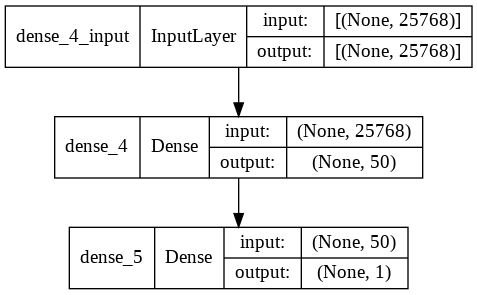

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True)

**Comparing Word Scoring Methods**

The *texts_to_matrix()* function for the Tokenizer in the Keras API provides 4 different methods for scoring words; 

they are:

- **binary** Where words are marked as present (1) or absent (0).
- **count** Where the occurrence count for each word is marked as an integer.
- **tfidf** Where each word is scored based on their frequency, where words that are common across all documents are penalized.
- **freq** Where words are scored based on their frequency of occurrence within the document.

We can evaluate the skill of the model developed in the previous section fit using each of the 4 supported word scoring modes.

The function *prepare_data()* implements this behavior given lists of train and
test documents.


We also need a function to **evaluate** the MLP given a specific encoding of the data.

The function below, named *evaluate_mode()*, takes encoded documents and evaluates the MLP by training it on the train set and estimating skill on the test set 10 times and returns a list of the accuracy scores across all of these runs.



In [ ]:
# prepare bag-of-words encoding of docs
def prepare_data(train_docs, test_docs, mode):
    # create the tokenizer
    tokenizer = Tokenizer()
    # fit the tokenizer on the documents
    tokenizer.fit_on_texts(train_docs)
    # encode training data set
    Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
    # encode training data set
    Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
    return Xtrain, Xtest

In [ ]:
# evaluate a neural network model
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 30
    n_words = Xtest.shape[1]
    for i in range(n_repeats):
        # define network
        model = Sequential()
        model.add(Dense(50, input_shape=(n_words,), activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        # compile network
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        # fit network
        model.fit(Xtrain, ytrain, epochs=10, verbose=2)
        # evaluate
        loss, acc = model.evaluate(Xtest, ytest, verbose=0)
        scores.append(acc)
        print('%d accuracy: %s' % ((i+1), acc))
    return scores

1 accuracy: 0.925000011920929
2 accuracy: 0.925000011920929
3 accuracy: 0.9300000071525574
4 accuracy: 0.9350000023841858
5 accuracy: 0.9200000166893005
6 accuracy: 0.9399999976158142
7 accuracy: 0.9350000023841858
8 accuracy: 0.9350000023841858
9 accuracy: 0.9350000023841858
10 accuracy: 0.925000011920929
1 accuracy: 0.8949999809265137
2 accuracy: 0.8999999761581421
3 accuracy: 0.8949999809265137
4 accuracy: 0.9100000262260437
5 accuracy: 0.8999999761581421
6 accuracy: 0.8999999761581421
7 accuracy: 0.8949999809265137
8 accuracy: 0.9049999713897705
9 accuracy: 0.8949999809265137
10 accuracy: 0.8899999856948853
1 accuracy: 0.8899999856948853
2 accuracy: 0.8799999952316284
3 accuracy: 0.875
4 accuracy: 0.8849999904632568
5 accuracy: 0.8849999904632568
6 accuracy: 0.8999999761581421
7 accuracy: 0.8650000095367432
8 accuracy: 0.8899999856948853
9 accuracy: 0.8799999952316284
10 accuracy: 0.8650000095367432
1 accuracy: 0.8650000095367432
2 accuracy: 0.8700000047683716
3 accuracy: 0.8799999

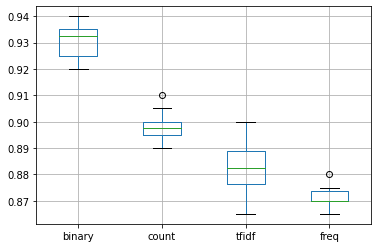

In [ ]:
# The complete example is listed below.

import string
import re
from os import listdir
from numpy import array
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
# from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from pandas import DataFrame
from matplotlib import pyplot

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory, vocab, is_train):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
    # skip any reviews in the test set
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines

# load and clean a dataset
def load_clean_dataset(vocab, is_train):
    # load documents
    directory_pos = '/content/gdrive/My Drive/txt_sentoken/pos'
    directory_neg = '/content/gdrive/My Drive/txt_sentoken/neg'
    
    neg = process_docs(directory_neg, vocab, is_train)
    pos = process_docs(directory_pos, vocab, is_train)
    docs = neg + pos
    # prepare labels
    labels = array([0 for _ in range(len(neg))] + [1 for _ in range(len(pos))])
    return docs, labels

# define the model
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# evaluate a neural network model
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 10         # Numbers to repeat------------------------------------------#
    n_words = Xtest.shape[1]
    for i in range(n_repeats):
        # define network
        model = define_model(n_words)
        # fit network
        model.fit(Xtrain, ytrain, epochs=10, verbose=0)
        # evaluate
        _, acc = model.evaluate(Xtest, ytest, verbose=0)
        scores.append(acc)
        print('%d accuracy: %s' % ((i+1), acc))
    return scores

# prepare bag-of-words encoding of docs
def prepare_data(train_docs, test_docs, mode):
    # create the tokenizer
    tokenizer = Tokenizer()
    # fit the tokenizer on the documents
    tokenizer.fit_on_texts(train_docs)
    # encode training data set
    Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
    # encode training data set
    Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
    return Xtrain, Xtest


# load the vocabulary
vocab_filename = '/content/gdrive/My Drive/txt_sentoken/vocab_train.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)

# run experiment
modes = ['binary', 'count', 'tfidf', 'freq']
results = DataFrame()
for mode in modes:
    # prepare data for mode
    Xtrain, Xtest = prepare_data(train_docs, test_docs, mode)
    # evaluate model on data for mode
    results[mode] = evaluate_mode(Xtrain, ytrain, Xtest, ytest)

# summarize results
print(results.describe())
# plot results
results.boxplot()
pyplot.title('Accuracy vs Different Word Scoring Methods.')
pyplot.ylabel('Accuracy')
pyplot.show()


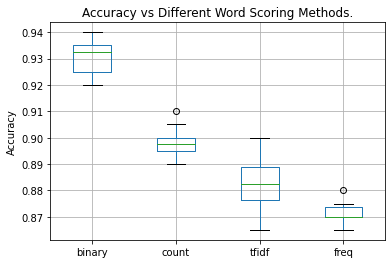

<Figure size 360x576 with 0 Axes>

In [ ]:
results.boxplot()
pyplot.title('Accuracy vs Different Word Scoring Methods.')
pyplot.ylabel('Accuracy')
pyplot.show()

**Predicting Sentiment for New Reviews**

Predicting the sentiment of new reviews involves following the same steps used to prepare the test data. 

Specifically, 
- loading the text, 
- cleaning the document, 
- filtering tokens by the chosen vocabulary, 
- converting the remaining tokens to a line, 
- encoding it using the Tokenizer, 
- and making a prediction.

We can make a prediction of a class value directly with the fit model
by calling *predict()* that will return an integer of 0 for a negative review and 1 for a positive
review.

All of these steps can be put into a new function called *predict_sentiment()* that requires the review text, the vocabulary, the tokenizer, and the fit model and returns the predicted sentiment and an associated percentage or confidence-like output.



In [ ]:
# Function for making predictions for new reviews.

# classify a review as negative or positive
def predict_sentiment(review, vocab, tokenizer, model):
    # clean
    tokens = clean_doc(review)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    # convert to line
    line = ' '.join(tokens)
    # encode
    encoded = tokenizer.texts_to_matrix([line], mode='binary')
    # predict sentiment
    yhat = model.predict(encoded, verbose=0)
    # retrieve predicted percentage and label
    percent_pos = yhat[0,0]
    if round(percent_pos) == 0:
        return (1-percent_pos), 'NEGATIVE'
    return percent_pos, 'POSITIVE'

We can now make predictions for new review texts. Below is an example with both a clearly *positive* and a clearly *negative* review using the simple MLP developed above with the frequency word scoring mode.

In [ ]:
# test positive text
text = 'Best movie ever! It was great, I recommend it.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))


# test negative text
text = 'This is a bad movie.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

In [ ]:
# Pulling this all together, the complete example for making predictions for new reviews is
# listed below.


import string
import re
from os import listdir
from numpy import array
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory, vocab, is_train):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
    # skip any reviews in the test set
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines

# load and clean a dataset
def load_clean_dataset(vocab, is_train):
    # load documents
    directory_pos = '/content/gdrive/My Drive/txt_sentoken/pos'
    directory_neg = '/content/gdrive/My Drive/txt_sentoken/neg'
    
    neg = process_docs(directory_neg, vocab, is_train)
    pos = process_docs(directory_pos, vocab, is_train)
    docs = neg + pos
    # prepare labels
    labels = array([0 for _ in range(len(neg))] + [1 for _ in range(len(pos))])
    return docs, labels

# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

# define the model
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

# classify a review as negative or positive
def predict_sentiment(review, vocab, tokenizer, model):
    # clean
    tokens = clean_doc(review)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    # convert to line
    line = ' '.join(tokens)
    # encode
    encoded = tokenizer.texts_to_matrix([line], mode='binary')
    # predict sentiment
    yhat = model.predict(encoded, verbose=0)
    # retrieve predicted percentage and label
    percent_pos = yhat[0,0]
    if round(percent_pos) == 0:
        return (1-percent_pos), 'NEGATIVE'
    return percent_pos, 'POSITIVE'

# load the vocabulary
vocab_filename = '/content/gdrive/My Drive/txt_sentoken/vocab_train.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)

# create the tokenizer
tokenizer = create_tokenizer(train_docs)
# encode data
Xtrain = tokenizer.texts_to_matrix(train_docs, mode='binary')
Xtest = tokenizer.texts_to_matrix(test_docs, mode='binary')

# define network
n_words = Xtrain.shape[1]
model = define_model(n_words)

# fit network
model.fit(Xtrain, ytrain, epochs=10, verbose=2)

# test positive text
text = 'Best movie ever! It was great, I recommend it.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('\n\nReview: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

# test negative text
text = 'This is a bad movie.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('\n\nReview: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 50)                1288450   
                                                                 
 dense_83 (Dense)            (None, 1)                 51        
                                                                 
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
57/57 - 1s - loss: 0.4845 - accuracy: 0.7644 - 733ms/epoch - 13ms/step
Epoch 2/10
57/57 - 0s - loss: 0.0660 - accuracy: 0.9911 - 222ms/epoch - 4ms/step
Epoch 3/10
57/57 - 0s - loss: 0.0175 - accuracy: 0.9994 - 231ms/epoch - 4ms/step
Epoch 4/10
57/57 - 0s - loss: 0.0089 - accuracy: 1.0000 - 227ms/epoch - 4ms/step
Epoch 5/10
57/57 - 0s - loss: 0.0055 - accuracy: 1.0000 - 241ms/epoch - 4ms/step
Epoch 6/10
57/57 - 0s - loss: 0.0

This section lists some extensions if you are looking to get more out of this tutorial.
- **Manage Vocabulary**. Explore using a larger or smaller vocabulary. Perhaps you can get better performance with a smaller set of words.
- **Tune the Network Topology**. Explore alternate network topologies such as deeper or wider networks. Perhaps you can get better performance with a more suited network.
- **Use Regularization**. Explore the use of regularization techniques, such as dropout. Perhaps you can delay the convergence of the model and achieve better test set performance.
- **More Data Cleaning**. Explore more or less cleaning of the review text and see how it impacts the model skill.
- **Training Diagnostics**. Use the test dataset as a validation dataset during training and create plots of train and test loss. Use these diagnostics to tune the batch size and number of training epochs.
- **Trigger Words**. Explore whether there are speci-c words in reviews that are highly predictive of the sentiment.
- **Use Bigrams**. Prepare the model to score bigrams of words and evaluate the performance under different scoring schemes.
- **Truncated Reviews**. Explore how using a truncated version of the movie reviews results impacts model skill, try truncating the start, end and middle of reviews.
- **Ensemble Models**. Create models with different word scoring schemes and see if using ensembles of the models results in improves to model skill.
- **Real Reviews**. Train a final model on all data and evaluate the model on real movie reviews taken from the internet.

**خلاصه فرآیند مدل سازی تشخیص احساسات با روش کیسه کلمات**

تشخیص احساس در مورد نظرات افراد دررابطه با فیلم ها می باشد که هزار نظر مثبت در فولدر نظرات مثبت و هزار نظر منفی در فولدر منفی ذخیره شده است

هدف این است که با آموزش این کلمات و متون به ماشین نظرات جدید را بتوانیم دسته بندی کنیم و در واقع خروجی مدل بصورت باینری خواهد بود که صفر برای نظر منفی و یک برای نظر مثبت خواهد بود

1.ابتدا کلیه کلمات از متن های مثبت و منفی خوانده و پس از تمیز کاری در فایلی ذخیره می شوند تا بعنوان مرجع مورد استفاده قرار گیرد

2.در گام دوم متن های فولدرهای مثبت ومنفی خوانده می شوند و اگر کلمات آنها در مرجع موجود بود در یک خط با یک فاصله اسپیس کنار هم قرار می گیرند و داده های منفی با صفر و مثبت با یک در ستون مجزا لیبل گذاری می شوند 

3.در گام سوم داده های آموزش و تست باید جداسازی شوند در این درس بر اساس نام فایل که دارای شماره سریال بود این کار انجام شد و ده درصد داده ها برای تست در نظر گرفته شد

4.در مرحله چهارم با استفاده از تابع توکنایزر از کتابخانه کراس از کلمات داده های آموزش آرایه ای تشکیل و آنها را با استفاده از تابع فیت آن تکستس اینکود می کنیم و آبجکتی از توکنایزر ایجاد می شود که برای تبدیل داده های تست نیز مورد استفاده قرار میگیرد

5.در مرحله پنجم و پس از تشکیل آبجکت توکنایزر از آرایه کلمات داده های آموزشی در مرحله چهارم داده های تست را نیز با همان آبجکت و تابع فیت آن تکستس اینکود می کنیم

6.در گام ششم و پس از تشکیل آرایه های داده های آموزش و تست آنها را به ماتریس های عددی تبدیل می کنیم این کار با استفاده از تابع تکست تو ماتریکس از آبجکت توکنایزر گام چهار انجام می شود

7.پس از آماده سازی داده های آموزش و تست کار آماده سازی مدل شبکه عصبی با استفاده از تابع سکوئنشال و تعریف لایه ها و تعداد آنها صورت می گیرد

8.در گام هشتم مدل را با داده های آموزشی فیت می نماییم 

9.پس از فیت کردن با داده های آموزشی مدل را با داده های تست آزمایش می کنیم و نمره ارزیابی آن را بررسی می کنیم

10.می توانیم با تغییر آرگومان های مختلف در تشکیل توکنایزر گام چهار یا تشکیل مدل در گام هفتم امتیازات بدست آمده را بررسی کنیم

11.با انتخاب بهترین پارامترها در گام دهم می توانیم داده های جدید برای گرفتن پیش بینی نتیجه به مدل ارائه نماییم و کار پیش بینی انجام شود

# Part V Word Embeddings

## **The Word Embedding Model**

Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation. 

They are a distributed representation for text that is perhaps one
of the key breakthroughs for the impressive performance of deep learning methods on challenging natural language processing problems.

After completing this chapter, you will know:
- What the word embedding approach for representing text is and how it diers from other feature extraction methods.
- That there are 3 main algorithms for learning a word embedding from text data.
- That you can either train a new embedding or use a pre-trained embedding on your natural language processing task.

**What Are Word Embeddings?**

A word embedding is an approach to provide a dense vector representation of words that capture something about their meaning. 

Word embeddings are an improvement over simpler bag-of-word model word encoding schemes like word counts and frequencies that result in large and sparse vectors (mostly 0 values) that describe documents but not the meaning of the words.




"""

*What does word embedding mean?*
Word embedding is just a fancy way of saying numerical representation of words. A good analogy would be how we use the RGB representation for colors. 

When in science, we say speed of my car is 45 km/hr we gain a sense of how fast/slow we are driving. If we say my friend is driving at 60 km/hr, we can compare which one of us is going faster.

What’s worth more a shoe or a purse? Well, as different as those two objects are, one way to answer that is to compare their prices.

Now that we know numerical representation of objects aids in analysis by quantifying a certain quality, the question is *what quality of words do we want to quantify?*

The answer to that is, we want to quantify the semantics. We want to represent words in such a manner that it captures its meaning in a way humans do. Not the exact meaning of the word but a contextual one. For example, when I say the word see, we know exactly what action — the context — I’m talking about, even though we might not be able to quote its meaning, the kind we would find in a dictionary, of the top of our head.

"""

(https://towardsdatascience.com/nlp-101-word2vec-skip-gram-and-cbow-93512ee24314)



**Word Embedding Algorithms**

**1- Embedding Layer**

The one hot encoded words are mapped to the word vectors. If a Multilayer Perceptron model is used, then the word vectors are concatenated before being fed as input to the model.

This approach of learning an embedding layer requires a lot of training data and can be slow, but will learn an embedding both targeted to the specific text data and the NLP task.

**2- Word2Vec**

Word2Vec is a statistical method for efficiently learning a standalone word embedding from a text corpus.

Additionally, the work involved analysis of the learned vectors and the exploration of vector math on the representations of words. 

For example, that subtracting the man-ness from *King* and adding women-ness results in the word *Queen*, capturing the analogy king is to queen as
man is to woman.

Two different learning models were introduced that can be used as part of the Word2Vec approach to learn the word embedding; they are:

- Continuous Bag-of-Words, or CBOW model.
- Continuous Skip-Gram Model.

The CBOW model learns the embedding by predicting the current word based on its context.

The continuous skip-gram model learns by predicting the surrounding words given a current word.

Both models are focused on learning about words given their local usage context, where the context is defined by a window of neighboring words. 

This window is a configurable parameter of the model.

The size of the sliding window has a strong effect on the resulting vector similarities.

Large windows tend to produce more topical similarities [...], while smaller windows tend to produce more functional and syntactic similarities.

The key benefit of the approach is that high-quality word embeddings can be learned efficiently (low space and time complexity), allowing larger embeddings to be learned (more dimensions) from much larger corpora of text (billions of words).


**3- Glo Ve**

The Global Vectors for Word Representation, or GloVe, algorithm is an extension to the Word2Vec method for eciently learning word vectors.

Rather than using a window to define local context, GloVe constructs an explicit word-context or word co-occurrence matrix using statistics across the whole text corpus. 

The result is a learning model that may result in
generally better word embeddings.

GloVe, is a new global log-bilinear regression model for the unsupervised learning of word representations that outperforms other models on word analogy, word similarity, and named entity recognition tasks.

**Using Word Embeddings**

**Learn an Embedding**

You may choose to learn a word embedding for your problem. This will require a large amount of text data to ensure that useful embeddings are learned, such as millions or billions of words.

You have two main options when training your word embedding:
- **Learn it Standalone**, where a model is trained to learn the embedding, which is saved and used as a part of another model for your task later. This is a good approach if you would like to use the same embedding in multiple models.
- **Learn Jointly**, where the embedding is learned as part of a large task-specific model. This is a good approach if you only intend to use the embedding on one task.

**Reuse an Embedding**

It is common for researchers to make pre-trained word embeddings available for free, often under a permissive license so that you can use them on your own academic or commercial projects. For example, both Word2Vec and GloVe word embeddings are available for free download. 

These can be used on your project instead of training your own embeddings from scratch. You have
two main options when it comes to using pre-trained embeddings:
- **Static**, where the embedding is kept static and is used as a component of your model. This is a suitable approach if the embedding is a good fit for your problem and gives good
results.
- **Updated**, where the pre-trained embedding is used to seed the model, but the embedding is updated jointly during the training of the model. This may be a good option if you are looking to get the most out of the model and embedding on your task.

## **How to Develop Word Embeddings with Gensim**


Word embeddings are a modern approach for representing text in natural language processing.

Embedding algorithms like Word2Vec and GloVe are key to the state-of-the-art results achieved by neural network models on natural language processing problems like machine translation.

After completing this tutorial, you
will know:
- How to train your own Word2Vec word embedding model on text data.
- How to visualize a trained word embedding model using Principal Component Analysis.
- How to load pre-trained Word2Vec and GloVe word embedding models from Google and Stanford.



**Word Embeddings**

A word embedding is an approach to provide a dense vector representation of words that capture something about their meaning. 

Word embeddings are an improvement over simpler bag-of-word
model word encoding schemes like word counts and frequencies that result in large and sparse vectors (mostly 0 values) that describe documents but not the meaning of the words.

In this tutorial, we are going to look at how to use two dierent word embedding methods called Word2Vec by researchers at Google and GloVe by researchers at Stanford.


**Gensim Python Library**

Gensim is a mature, focused, and efficient suite of NLP tools for topic modeling.

It also provides tools for loading pre-trained word embeddings in a few formats and for making use and querying a loaded embedding.

**Develop Word2Vec Embedding**

Word2Vec is one algorithm for learning a word embedding from a text corpus. 

There are two main training algorithms that can be used to learn the embedding from text; they are **Continuous Bag-of-Words (CBOW)** and **skip grams**. 

We will not get into the algorithms other than to say that they generally look at a window of words for each target word to provide context and in turn meaning for words. 

The approach was developed by Tomas Mikolov, formerly at Google and currently at Facebook.

Gensim provides the Word2Vec class for working with a Word2Vec model. Learning a word embedding from text involves loading and organizing the text into sentences and providing them to the constructor of a new *Word2Vec()* instance. 

For example:

sentences = ...

model = Word2Vec(sentences)



Specifically, each sentence must be tokenized, meaning divided into words and prepared (e.g. perhaps pre-filtered and perhaps converted to a preferred case). 

The sentences could be text loaded into memory, or an iterator that progressively loads text, required for very large text corpora. 

There are many parameters on this constructor; a few noteworthy arguments you may wish to configure are:
- **size**: (default 100) The number of dimensions of the embedding, e.g. the length of the
dense vector to represent each token (word).
- **window**: (default 5) The maximum distance between a target word and words around the
target word.
- **min count**: (default 5) The minimum count of words to consider when training the model;
words with an occurrence less than this count will be ignored.
- **workers**: (default 3) The number of threads to use while training.
- **sg**: (default 0 or CBOW) The training algorithm, either **CBOW** (0) or **skip gram** (1).

In [ ]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print('\n\nwords are\n\n',words)

# print(model.wv.__getitem__('sentence'))
# access vector for one word
print('\n\nword embedding vector Shape:',model.wv.__getitem__('sentence').shape)
print('\n\nword embedding vector\n\n',model.wv.__getitem__('sentence'))
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


words are

 ['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


word embedding vector Shape: (100,)


word embedding vector

 [-0.00408992  0.00233549  0.00245788 -0.00315892 -0.00015476 -0.00019615
 -0.00400534 -0.00437021 -0.00356167  0.00106739 -0.0026697   0.00081435
 -0.00198241 -0.0021575  -0.00418156  0.0009296  -0.00373121 -0.00068261
  0.00031517  0.00283401 -0.00122963 -0.00483537  0.00444259 -0.00359695
 -0.00415709 -0.00259186  0.00225392  0.001174    0.00149953 -0.00091013
 -0.00222917  0.00462779 -0.00251706  0.0007516  -0.00359216  0.00396291
  0.00211514 -0.00244991  0.00296053  0.00177733  0.00189665 -0.0026813
 -0.00275128  0.00477049  0.00030689 -0.00436679  0.00448727  0.00209161
 -0.0016321  -0.00416475 -0.00225303 -0.0034928   0.00411773  0.00181645
 -0.00353575 -0.00010728 -0.00370376 -0.00463837 -0.00397267  0.0048064
 -0.00303444  0.00235117  0.004

**Plot Word Vectors Using PCA**

PCA(Priciple Components Analysis) will give us two components of each vector (from 100 in each vector) that we can use it for drawing a plot (scatterplot).

We can retrieve all of the vectors from a trained model as follows:

X = model[model.wv.vocab]

and use PCA from Scikit Learn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


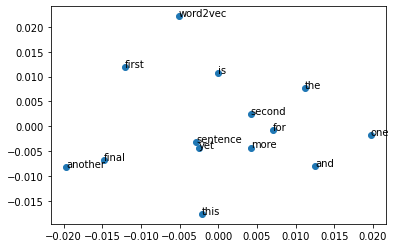

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

**Load Google's Word2Vec Embedding**

The pre-trained Google Word2Vec model was trained on Google news data (about 100
billion words); it contains 3 million words and phrases and was fit using 300-dimensional word vectors. It is a 1.53 Gigabyte file. 

You can download it from here:

GoogleNews-vectors-negative300.bin.gz.

https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

Unzipped, the binary file (GoogleNews-vectors-negative300.bin) is 3.4 Gigabytes. 

The Gensim library provides tools to load this file. 

Specically, you can call the *KeyedVectors.load_word2vec_format()* function to load this model into memory, 





In [ ]:
# for example:

filename = 'GoogleNews-vectors-negative300.bin'

model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [ ]:
# Example demonstrating arithmetic with Google word vectors.


from gensim.models import KeyedVectors
# load the google word2vec model
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)


# Reslt of Above code --------------->  [('queen', 0.7118192315101624)]

**Load Stanford's GloVe Embedding**

Like Word2Vec, the GloVe researchers also provide pre-trained word vectors, in this case, a great selection to choose from. 

You can download the GloVe pre-trained word vectors and load them easily with Gensim.

The first step is to convert the GloVe file format to the Word2Vec file
format. The only dierence is the addition of a small header line. 

This can be done by calling the *glove2word2vec()* function. 

For example Working with the 100-dimensional version of the model, we can convert the file to Word2Vec format as follows:

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

In [ ]:
# Example demonstrating how to load and use GloVe word embeddings.

from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# convert glove to word2vec format
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

# load the converted model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)


# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)


# Reslt of Above code --------------->  [('queen', 0.7698540687561035)]

## **How to Learn and Load Word Embeddings in Keras**


Two
popular examples of methods of learning word embeddings from text include:
- Word2Vec.
- GloVe.

In addition to these carefully designed methods, a word embedding can be learned as part of a deep learning model. 

This can be a slower approach, but tailors the model to a specific training dataset.

**Keras Embedding Layer**

Keras offers an Embedding layer that can be used for neural networks on text data. It requires that the input data be integer encoded, so that each word is represented by a unique integer.

This data preparation step can be performed using the Tokenizer API also provided with Keras.

The Embedding layer is initialized with **random weights** and will learn an embedding for all of the words in the training dataset. 

It is a flexible layer that can be used in a variety of ways, such as:
- It can be used alone to learn a word embedding that can be saved and used in another
model later.
- It can be used as part of a deep learning model where the embedding is learned along with the model itself.
- It can be used to load a pre-trained word embedding model, a type of transfer learning.

The Embedding layer is defined as the first hidden layer of a network. It must specify **3 arguments**:

- **input dim**: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.

- **output dim**: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test dierent values for your problem.
- **input length**: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

In [ ]:
# For example, below we define an Embedding layer with a vocabulary of 200 (e.g. integer
# encoded words from 0 to 199, inclusive), a vector space of 32 dimensions in which words will be
# embedded, and input documents that have 50 words each.

e = Embedding(200, 32, input_length=50)

**Example of Learning an Embedding**

We will define a small problem where we have 10
text documents, each with a comment about a piece of work a student submitted. Each text document is classified as positive 1 or negative 0. 

This is a simple sentiment analysis problem.

First, we will define the documents and their class labels.

In [ ]:
# define document

from numpy import array
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])

In [ ]:
# Keras provides the one hot() function that creates a
# hash of each word as an ecient integer encoding. We will estimate the vocabulary size of 50,
# which is much larger than needed to reduce the probability of collisions from the hash function.

# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

In [ ]:
# The sequences have dierent lengths and Keras prefers inputs to be vectorized and all inputs
# to have the same length. We will pad all input sequences to have the length of 4. Again, we can
# do this with a built in Keras function, in this case the pad sequences() function.

# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

We are now ready to define our Embedding layer as part of our neural network model.

The Embedding layer has a vocabulary of 50 and an input length of 4. We will choose a small embedding space of 8 dimensions. The model is a simple binary classification model.

Importantly, the output from the Embedding layer will be 4 vectors of 8 dimensions each, one for each word. 

We flatten this to a one 32-element vector to pass on to the Dense output layer.

In [ ]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
model.summary()

In [ ]:
# Finally, we can fit and evaluate the classification model.
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

In [ ]:
# The complete code listing is provided below.

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
# define documents
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print('Running the example first prints the integer encoded documents:\n',encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print('\n\nThen the padded versions of each document are printed, making them all uniform length:\n',padded_docs)
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
model.summary()
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Running the example first prints the integer encoded documents:
 [[4, 27], [25, 41], [24, 38], [48, 41], [11], [18], [45, 38], [5, 25], [45, 41], [5, 5, 27, 36]]


Then the padded versions of each document are printed, making them all uniform length:
 [[ 4 27  0  0]
 [25 41  0  0]
 [24 38  0  0]
 [48 41  0  0]
 [11  0  0  0]
 [18  0  0  0]
 [45 38  0  0]
 [ 5 25  0  0]
 [45 41  0  0]
 [ 5  5 27 36]]
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 4, 8)              400       
                                                                 
 flatten_5 (Flatten)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 433
Trainable params: 433
Non-tra

**Tips for Cleaning Text for Word Embedding**

Tomas Mikolov (one of the developers of Word2Vec, a popular word embedding method) :

There is no universal answer. It all depends on what you plan to use the vectors
for. 

In my experience, it is usually good to disconnect (or remove) punctuation from words, and sometimes also convert all characters to lowercase. One can also replace all numbers (possibly greater than some constant) with some single token such as .

All these pre-processing steps aim to reduce the vocabulary size without removing any important content (which in some cases may not be true when you lowercase certain words, 

ie. `Bush' is different than `bush', while `Another' has usually the same sense as `another'). The smaller the vocabulary is, the lower is the memory complexity, and the more robustly are the parameters for the words estimated. 

You also have to pre-process the test data in the same way.

In short, you will understand all this much better if you will run experiments.

# Part VI Text Classiffication

**Neural Models for Document Classiffication**

Text classiffication describes a general class of problems such as predicting the sentiment of tweets and movie reviews, as well as classifying email as spam or not. 

Deep learning methods are proving very good at text classiffication, achieving state-of-the-art results on a suite of standard academic benchmark problems.

**Overview**

This tutorial is divided into the following parts:
1. Word Embeddings + CNN = Text classiffication
2. Use a Single Layer CNN Architecture
3. Dial in CNN Hyperparameters
4. Consider Character-Level CNNs
5. Consider Deeper CNNs for classiffication

**Word Embeddings + CNN = Text Classiffication**

Neural networks in general oer better performance than classical
linear classiffiers, especially when used with pre-trained word embeddings.

Convolutional Neural Networks (CNN) are effective at document Classiffication,
namely because they are able to pick out salient features (e.g. tokens or sequences of tokens) in a way that is invariant to their position within the input sequences.

The architecture is therefore comprised of three key pieces:

- **Word Embedding**: A distributed representation of words where dierent words that have a similar meaning (based on their usage) also have a similar representation.
- **Convolutional Model**: A feature extraction model that learns to extract salient features from documents represented using a word embedding.
- **Fully Connected Model**: The interpretation of extracted features in terms of a predictive output.

**Use a Single Layer CNN Architecture**

Yoon Kim in his study of the use of pre-trained word vectors for classiffication tasks with Convolutional Neural Networks found that using pre-trained static word vectors does very well.

He suggests that pre-trained word embeddings that were trained on very large text corpora, such as the freely available Word2Vec vectors trained on 100 billion tokens from Google news may offer good universal features for use in natural language processing.

**Project: Develop an Embedding + CNN Model for Sentiment Analysis**

In this tutorial, you will discover how to develop word embedding models
with convolutional neural networks to classify movie reviews. 

After completing this tutorial, you will know:
- How to prepare movie review text data for classiffication with deep learning methods.
- How to develop a neural classiffication model with word embedding and convolutional layers.
- How to evaluate the developed a neural classiffication model.


**Data Preparation**

**Note**: The preparation of the movie review dataset was first described in Part IV. 

In this section, we will look at 3 things:
1. Separation of data into training and test sets.
2. Loading and cleaning the data to remove punctuation and numbers.
3. Defining a vocabulary of preferred words.

**Split into Train and Test Sets**

we will use the last 100 positive reviews and the last 100 negative reviews
as a test set (100 reviews) and the remaining 1,800 reviews as the training dataset. This is a 90% train, 10% split of the data. 

The split can be imposed easily by using the filenames of the
reviews where reviews named 000 to 899 are for training data and reviews named 900 onwards are for test.

**Loading and Cleaning Reviews**   -----------> clean_doc(doc) function

The text data is already pretty clean; not much preparation is required. Without getting bogged down too much in the details, we will prepare the data using the following way:
- Split tokens on white space.
- Remove all punctuation from words.
- Remove all words that are not purely comprised of alphabetical characters.
- Remove all words that are known stop words.
- Remove all words that have a length >= 1 character.

In [ ]:
# Pulling all of this together, the complete example is listed below.

import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # update counts
    vocab.update(tokens)

# load all docs in a directory
def process_docs(directory, vocab):
    # walk through all files in the folder
    for filename in listdir(directory):
    # skip any reviews in the test set - Seperating Training and Test sets
        if filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # add doc to vocab
        add_doc_to_vocab(path, vocab)

# save list to file
def save_list(lines, filename):
    # convert lines to a single blob of text
    data = '\n'.join(lines)
    # open file
    file = open(filename, 'w')
    # write text
    file.write(data)
    # close file
    file.close()


# define vocab
vocab = Counter()
# add all docs to vocab
directory_pos = '/content/gdrive/My Drive/txt_sentoken/pos'
directory_neg = '/content/gdrive/My Drive/txt_sentoken/neg'

process_docs(directory_pos, vocab)
process_docs(directory_neg, vocab)

# print the size of the vocab
print(len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))

# keep tokens with a min occurrence
min_occurrence = 2
tokens = [k for k,c in vocab.items() if c >= min_occurrence]
print('\n\nkeep tokens with a min occurrence:\n',len(tokens))

# save tokens to a vocabulary file
save_list(tokens, '/content/gdrive/My Drive/txt_sentoken/vocab_train.txt')

44276
[('film', 7983), ('one', 4946), ('movie', 4826), ('like', 3201), ('even', 2262), ('good', 2080), ('time', 2041), ('story', 1907), ('films', 1873), ('would', 1844), ('much', 1824), ('also', 1757), ('characters', 1735), ('get', 1724), ('character', 1703), ('two', 1643), ('first', 1588), ('see', 1557), ('way', 1515), ('well', 1511), ('make', 1418), ('really', 1407), ('little', 1351), ('life', 1334), ('plot', 1288), ('people', 1269), ('could', 1248), ('bad', 1248), ('scene', 1241), ('movies', 1238), ('never', 1201), ('best', 1179), ('new', 1140), ('scenes', 1135), ('man', 1131), ('many', 1130), ('doesnt', 1118), ('know', 1092), ('dont', 1086), ('hes', 1024), ('great', 1014), ('another', 992), ('action', 985), ('love', 977), ('us', 967), ('go', 952), ('director', 948), ('end', 946), ('something', 945), ('still', 936)]


keep tokens with a min occurrence:
 25767


We are now ready to look at extracting features from the reviews ready for modeling.

**Train CNN With Embedding Layer**

The real valued vector representation for words can be learned while training the neural network. We can do this in the Keras deep learning library using the Embedding layer. 

The first step is to load the vocabulary. We will use it to filter out words from movie reviews that we are not interested in.

The steps of preparing data and train and test is as above cells in project of Developing Neural Bag-of-Words Model for Sentiment Analysis....So please look there for the comments on functions.

Now that the mapping of words to integers has been prepared, we can use it to encode the reviews in the training dataset. We can do that by calling the *texts_to_sequences()* function on the Tokenizer. 

We also need to ensure that all documents have the same length. This is a
requirement of Keras for efficient computation. We could truncate reviews to the smallest size or zero-pad (pad with the value 0) reviews to the maximum length, or some hybrid. 

In this case, we will pad all reviews to the length of the longest review in the training dataset. 

First, we can find the longest review using the *max()* function on the training dataset and take its length.

We can then call the Keras function *pad_sequences()* to pad the sequences to the maximum length by adding 0 values on the end.


The Embedding layer requires the speciffication of the vocabulary
size, the size of the real-valued vector space, and the maximum length of input documents. 

The vocabulary size is the total number of words in our vocabulary, plus one for unknown words.

This could be the vocab set length or the size of the vocab within the tokenizer used to integer
encode the documents

In addition, We will use a 100-dimensional vector space, but you could try other values, such as 50 or 150. 

Finally, the maximum document length was calculated above in the max length variable used during padding. The complete model definition is listed below including the Embedding layer. 

We use a Convolutional Neural Network (CNN) as they have proven to be successful at document classification problems. 

A conservative CNN configuration is used with 32 filters
(parallel fields for processing words) and a kernel size of 8 with a rectified linear (relu) activation function. 

This is followed by a pooling layer that reduces the output of the convolutional layer by half.

Next, the 2D output from the CNN part of the model is 
attened to one long 2D vector to represent the features extracted by the CNN. 

The back-end of the model is a standard Multilayer Perceptron layers to interpret the CNN features. The output layer uses a sigmoid activation
function to output a value between 0 and 1 for the negative and positive sentiment in the review.

here is the complete code:

In [ ]:
# Complete example of fitting a CNN model with an Embedding input layer.

import string
import re
from os import listdir
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc, vocab):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # filter out tokens not in vocab
    tokens = [w for w in tokens if w in vocab]
    tokens = ' '.join(tokens)
    return tokens

# load all docs in a directory
def process_docs(directory, vocab, is_train):
    documents = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load the doc
        doc = load_doc(path)
        # clean doc
        tokens = clean_doc(doc, vocab)
        # add to list
        documents.append(tokens)
    return documents

# load and clean a dataset
def load_clean_dataset(vocab, is_train):
    # load documents
    directory_pos = '/content/gdrive/My Drive/txt_sentoken/pos'
    directory_neg = '/content/gdrive/My Drive/txt_sentoken/neg'

    neg = process_docs(directory_neg, vocab, is_train)
    pos = process_docs(directory_pos, vocab, is_train)
    docs = neg + pos
    # prepare labels
    labels = array([0 for _ in range(len(neg))] + [1 for _ in range(len(pos))])
    return docs, labels

# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

# integer encode and pad documents
def encode_docs(tokenizer, max_length, docs):
    # integer encode
    encoded = tokenizer.texts_to_sequences(docs)
    # pad sequences
    padded = pad_sequences(encoded, maxlen=max_length, padding='post')
    return padded

# define the model
def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    model.add(Conv1D(32, 8, activation='relu'))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model




# load the vocabulary
vocab_filename = '/content/gdrive/My Drive/txt_sentoken/vocab_train.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

# load training data
train_docs, ytrain = load_clean_dataset(vocab, True)
# create the tokenizer
tokenizer = create_tokenizer(train_docs)
# define vocabulary size
vocab_size = len(tokenizer.word_index) + 1

print('Vocabulary size: %d' % vocab_size)
# calculate the maximum sequence length
max_length = max([len(s.split()) for s in train_docs])
print('Maximum length: %d' % max_length)
# encode data
Xtrain = encode_docs(tokenizer, max_length, train_docs)
# define model
model = define_model(vocab_size, max_length)
# fit network
model.fit(Xtrain, ytrain, epochs=10, verbose=2)
# save the model
model.save('/content/gdrive/My Drive/txt_sentoken/model.h5')

Vocabulary size: 25768
Maximum length: 1317
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1317, 100)         2576800   
                                                                 
 conv1d (Conv1D)             (None, 1310, 32)          25632     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 655, 32)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 20960)             0         
                                                                 
 dense (Dense)               (None, 10)                209610    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
            

**Evaluate Model**

In this section, we will evaluate the trained model and use it to make predictions on new data.

First, we can use the built-in *evaluate()* function to estimate the skill of the model on both the training and test dataset. 

This requires that we load and encode both the training and test
datasets.

We can then load the model and evaluate it on both datasets and print the accuracy.

New data must then be prepared using the same text encoding and encoding schemes as was used on the training dataset. 

Once prepared, a prediction can be made by calling the *predict()*
function on the model. 

The function below named *predict_sentiment()* will encode and pad a given movie review text and return a prediction in terms of both the percentage and a label.

We can test out this model with two ad hoc movie reviews. 

The complete example is listed below.

In [ ]:
import string
import re
from os import listdir
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc, vocab):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # filter out tokens not in vocab
    tokens = [w for w in tokens if w in vocab]
    tokens = ' '.join(tokens)
    return tokens

# load all docs in a directory
def process_docs(directory, vocab, is_train):
    documents = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load the doc
        doc = load_doc(path)
        # clean doc
        tokens = clean_doc(doc, vocab)
        # add to list
        documents.append(tokens)
    return documents

# load and clean a dataset
def load_clean_dataset(vocab, is_train):
    # load documents
    directory_pos = '/content/gdrive/My Drive/txt_sentoken/pos'
    directory_neg = '/content/gdrive/My Drive/txt_sentoken/neg'

    neg = process_docs(directory_neg, vocab, is_train)
    pos = process_docs(directory_pos, vocab, is_train)
    docs = neg + pos
    # prepare labels
    labels = array([0 for _ in range(len(neg))] + [1 for _ in range(len(pos))])
    return docs, labels

# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

# integer encode and pad documents
def encode_docs(tokenizer, max_length, docs):
    # integer encode
    encoded = tokenizer.texts_to_sequences(docs)
    # pad sequences
    padded = pad_sequences(encoded, maxlen=max_length, padding='post')
    return padded

# classify a review as negative or positive
def predict_sentiment(review, vocab, tokenizer, max_length, model):
    # clean review
    line = clean_doc(review, vocab)
    # encode and pad review
    padded = encode_docs(tokenizer, max_length, [line])
    # predict sentiment
    yhat = model.predict(padded, verbose=0)
    # retrieve predicted percentage and label
    percent_pos = yhat[0,0]
    if round(percent_pos) == 0:
        return (1-percent_pos), 'NEGATIVE'
    return percent_pos, 'POSITIVE'

# load the vocabulary
vocab_filename = '/content/gdrive/My Drive/txt_sentoken/vocab_train.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)
# create the tokenizer
tokenizer = create_tokenizer(train_docs)
# define vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)
# calculate the maximum sequence length
max_length = max([len(s.split()) for s in train_docs])
print('Maximum length: %d' % max_length)
# encode data
Xtrain = encode_docs(tokenizer, max_length, train_docs)
Xtest = encode_docs(tokenizer, max_length, test_docs)

# load the model
model = load_model('/content/gdrive/My Drive/txt_sentoken/model.h5')

# evaluate model on training dataset
_, acc = model.evaluate(Xtrain, ytrain, verbose=0)
print('Train Accuracy: %.2f' % (acc*100))
# evaluate model on test dataset
_, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %.2f' % (acc*100))

# test positive text
text = 'Everyone will enjoy this film. I love it, recommended!'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, max_length, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

# test negative text
text = 'This is a bad movie. Do not watch it. It sucks.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, max_length, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

Vocabulary size: 25768
Maximum length: 1317
Train Accuracy: 100.00
Test Accuracy: 86.50
Review: [Everyone will enjoy this film. I love it, recommended!]
Sentiment: NEGATIVE (50.480%)
Review: [This is a bad movie. Do not watch it. It sucks.]
Sentiment: NEGATIVE (57.071%)


In [ ]:
# test positive text
text = 'Everyone will enjoy this film. I love it, recommended!'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, max_length, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

# test negative text
text = 'This is a boring movie. Do not watch it. It sucks.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, max_length, model)
print('\n\nReview: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

Review: [Everyone will enjoy this film. I love it, recommended!]
Sentiment: NEGATIVE (50.730%)


Review: [This is a boring movie. Do not watch it. It sucks.]
Sentiment: NEGATIVE (51.135%)


Extensions
This section lists some ideas for extending the tutorial that you may wish to explore.
- **Data Cleaning**. Explore better data cleaning, perhaps leaving some punctuation in tact
or normalizing contractions.
- **Truncated Sequences**. Padding all sequences to the length of the longest sequence might be extreme if the longest sequence is very dierent to all other reviews. Study the distribution of review lengths and truncate reviews to a mean length.
- **Truncated Vocabulary**. We removed infrequently occurring words, but still had a large vocabulary of more than 25,000 words. Explore further reducing the size of the vocabulary and the effect on model skill.
- **Filters and Kernel Size**. The number of filters and kernel size are important to model skill and were not tuned. Explore tuning these two CNN parameters.
- **Epochs and Batch Size**. The model appears to fit the training dataset quickly. Explore alternate configurations of the number of training epochs and batch size and use the test dataset as a validation set to pick a better stopping point for training the model.
- **Deeper Network**. Explore whether a deeper network results in better skill, either in terms of CNN layers, MLP layers and both.
- **Pre-Train an Embedding**. Explore pre-training a Word2Vec word embedding in the model and the impact on model skill with and without further fine tuning during training.
- **Use GloVe Embedding**. Explore loading the pre-trained GloVe embedding and the impact on model skill with and without further fine tuning during training.
- **Longer Test Reviews**. Explore whether the skill of model predictions is dependent on the length of movie reviews as suspected in the final section on evaluating the model.
- **Train Final Model**. Train a final model on all available data and use it make predictions on real ad hoc movie reviews from the internet.

**Project: Develop an n-gram CNN Model for Sentiment Analysis**



This tutorial is divided into the following parts:
1. Movie Review Dataset. *(like previouse section)*
2. Data Preparation.    *(like previouse section only X and y are saved in Pickles)*
3. Develop Multi-channel Model.
4. Evaluate Model.




we want to save the prepared train and test sets to file so that we can load them later for modeling and model evaluation. 

The function below-named *save_datase()* will save a given prepared dataset (X and y elements) to a file using the pickle API (this is the standard
API for saving objects in Python).

Running the example cleans the text movie review documents, creates labels, and saves the prepared data for both train and test datasets in train.pkl and test.pkl respectively. 


In [ ]:
import string
import re
from os import listdir
from nltk.corpus import stopwords
from pickle import dump

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    tokens = ' '.join(tokens)
    return tokens

# load all docs in a directory
def process_docs(directory, is_train):
    documents = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load the doc
        doc = load_doc(path)
        # clean doc
        tokens = clean_doc(doc)
        # add to list
        documents.append(tokens)
    return documents

# load and clean a dataset
def load_clean_dataset(is_train):
    # load documents
    directory_pos = '/content/gdrive/My Drive/txt_sentoken/pos'
    directory_neg = '/content/gdrive/My Drive/txt_sentoken/neg'

    neg = process_docs(directory_neg, is_train)
    pos = process_docs(directory_pos, is_train)
    docs = neg + pos
    # prepare labels
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels


# save a dataset to file
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)

# load and clean all reviews
train_docs, ytrain = load_clean_dataset(True)
test_docs, ytest = load_clean_dataset(False)

# save training datasets
save_dataset([train_docs, ytrain], '/content/gdrive/My Drive/txt_sentoken/train.pkl')
save_dataset([test_docs, ytest], '/content/gdrive/My Drive/txt_sentoken/test.pkl')

Saved: /content/gdrive/My Drive/txt_sentoken/train.pkl
Saved: /content/gdrive/My Drive/txt_sentoken/test.pkl


**Develop Multi-channel Model**

In this section, we will develop a multi-channel convolutional neural network for the sentiment analysis prediction problem. This section is divided into 3 parts:
1. Encode Data
2. Define Model.
3. Complete Example.

**Encode Data**

The first step is to load the cleaned training dataset. The function below-named *load_dataset()* can be called to load the pickled training dataset.

Next, we must fit a Keras Tokenizer on the training dataset. We will use this tokenizer to both define the vocabulary for the Embedding layer and encode the review documents as integers.

The function *create_tokenizer()* below will create a Tokenizer given a list of documents.

We also need to know the maximum length of input sequences as input for the model and to pad all sequences to the fixed length. The function *max_length()* below will calculate the maximum length (number of words) for all reviews in the training dataset.

We also need to know the size of the vocabulary for the Embedding layer. This can be calculated from the prepared Tokenizer

Finally, we can integer encode and pad the clean movie review text. The function below named *encode_text()* will both encode and pad text data to the maximum review length.

**Define Model**

A standard model for document classiffication is to use an Embedding layer as input, followed by a one-dimensional convolutional neural network, pooling layer, and then a prediction output layer.

The kernel size in the convolutional layer defines the number of words to consider as the convolution is passed across the input text document, providing a grouping parameter. 

A multi-channel convolutional neural network for document classiffication involves using multiple versions of the standard model with dierent sized kernels. 

This allows the document to be processed at different resolutions or different *n-grams* (groups of words) at a time, whilst the model learns how to best integrate these interpretations.

In Keras, a multiple-input model can be defined using the functional API. We will define a model with three input channels for processing 4-grams, 6-grams, and 8-grams of movie review text. 

Each channel is comprised of the following elements:
- **Input layer** that defines the length of input sequences.
- **Embedding layer** set to the size of the vocabulary and 100-dimensional real-valued representations.
- **Conv1D layer** with 32 filters and a kernel size set to the number of words to read at once.
- **MaxPooling1D** layer to consolidate the output from the convolutional layer.
- **Flatten layer** to reduce the three-dimensional output to two dimensional for concatenation.

The output from the three channels are concatenated into a single vector and process by a Dense layer and an output layer. 

The function below defines and returns the model.

In [ ]:
# define the model
def define_model(length, vocab_size):
    # channel 1
    inputs1 = Input(shape=(length,))
    embedding1 = Embedding(vocab_size, 100)(inputs1)
    conv1 = Conv1D(32, 4, activation='relu')(embedding1)
    drop1 = Dropout(0.5)(conv1)
    pool1 = MaxPooling1D()(drop1)
    flat1 = Flatten()(pool1)

    # channel 2
    inputs2 = Input(shape=(length,))
    embedding2 = Embedding(vocab_size, 100)(inputs2)
    conv2 = Conv1D(32, 6, activation='relu')(embedding2)
    drop2 = Dropout(0.5)(conv2)
    pool2 = MaxPooling1D()(drop2)
    flat2 = Flatten()(pool2)

    # channel 3
    inputs3 = Input(shape=(length,))
    embedding3 = Embedding(vocab_size, 100)(inputs3)
    conv3 = Conv1D(32, 8, activation='relu')(embedding3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling1D()(drop3)
    flat3 = Flatten()(pool3)
    
    # merge
    merged = concatenate([flat1, flat2, flat3])
    # interpretation
    dense1 = Dense(10, activation='relu')(merged)
    outputs = Dense(1, activation='sigmoid')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    # compile
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize
    model.summary()
    plot_model(model, show_shapes=True, to_file='multichannel.png')
    return model

**Complete Example**

Pulling all of this together, the complete example is listed below.

In [ ]:
from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

# load a clean dataset
def load_dataset(filename):
    return load(open(filename, 'rb'))

# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

# calculate the maximum document length
def max_length(lines):
    return max([len(s.split()) for s in lines])

# encode a list of lines
def encode_text(tokenizer, lines, length):
    # integer encode
    encoded = tokenizer.texts_to_sequences(lines)
    # pad encoded sequences
    padded = pad_sequences(encoded, maxlen=length, padding='post')
    return padded

# define the model
def define_model(length, vocab_size):
    # channel 1
    inputs1 = Input(shape=(length,))
    embedding1 = Embedding(vocab_size, 100)(inputs1)
    conv1 = Conv1D(32, 4, activation='relu')(embedding1)
    drop1 = Dropout(0.5)(conv1)
    pool1 = MaxPooling1D()(drop1)
    flat1 = Flatten()(pool1)

    # channel 2
    inputs2 = Input(shape=(length,))
    embedding2 = Embedding(vocab_size, 100)(inputs2)
    conv2 = Conv1D(32, 6, activation='relu')(embedding2)
    drop2 = Dropout(0.5)(conv2)
    pool2 = MaxPooling1D()(drop2)
    flat2 = Flatten()(pool2)

    # channel 3
    inputs3 = Input(shape=(length,))
    embedding3 = Embedding(vocab_size, 100)(inputs3)
    conv3 = Conv1D(32, 8, activation='relu')(embedding3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling1D()(drop3)
    flat3 = Flatten()(pool3)
    
    # merge
    merged = concatenate([flat1, flat2, flat3])
    # interpretation
    dense1 = Dense(10, activation='relu')(merged)
    outputs = Dense(1, activation='sigmoid')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    # compile
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize
    model.summary()
    plot_model(model, show_shapes=True, to_file='multichannel.png')
    return model

# load training dataset
trainLines, trainLabels = load_dataset('/content/gdrive/My Drive/txt_sentoken/train.pkl')
# create tokenizer
tokenizer = create_tokenizer(trainLines)

# calculate max document length
length = max_length(trainLines)
print('Max document length: %d' % length)

# calculate vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)

# encode data
trainX = encode_text(tokenizer, trainLines, length)
# define model
model = define_model(length, vocab_size)
# fit model
model.fit([trainX,trainX,trainX], array(trainLabels), epochs=7, batch_size=16)
# save the model
model.save('/content/gdrive/My Drive/txt_sentoken/model_1.h5')

Max document length: 1380
Vocabulary size: 44277
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1380)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1380)]       0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1380)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 1380, 100)    4427700     ['input_1[0][0]']                
                                             

**Evaluate Model**

In this section, we can evaluate the fit model by predicting the sentiment on all reviews in the unseen test dataset. 

Using the data loading functions developed in the previous section, we can
load and encode both the training and test datasets.

We can load the saved model and evaluate it on both the training and test datasets. 

The complete example is listed below.

In [ ]:
from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
# load a clean dataset
def load_dataset(filename):
    return load(open(filename, 'rb'))
# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer
# calculate the maximum document length
def max_length(lines):
    return max([len(s.split()) for s in lines])
# encode a list of lines
def encode_text(tokenizer, lines, length):
    # integer encode
    encoded = tokenizer.texts_to_sequences(lines)
    # pad encoded sequences
    padded = pad_sequences(encoded, maxlen=length, padding='post')
    return padded
    
# load datasets
trainLines, trainLabels = load_dataset('/content/gdrive/My Drive/txt_sentoken/train.pkl')
testLines, testLabels = load_dataset('/content/gdrive/My Drive/txt_sentoken/test.pkl')
# create tokenizer
tokenizer = create_tokenizer(trainLines)
# calculate max document length
length = max_length(trainLines)
print('Max document length: %d' % length)
# calculate vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)
# encode data
trainX = encode_text(tokenizer, trainLines, length)
testX = encode_text(tokenizer, testLines, length)

# load the model
model = load_model('/content/gdrive/My Drive/txt_sentoken/model_1.h5')
# evaluate model on training dataset
_, acc = model.evaluate([trainX,trainX,trainX], array(trainLabels), verbose=0)
print('Train Accuracy: %.2f' % (acc*100))
# evaluate model on test dataset dataset
_, acc = model.evaluate([testX,testX,testX], array(testLabels), verbose=0)
print('Test Accuracy: %.2f' % (acc*100))

Max document length: 1380
Vocabulary size: 44277
Train Accuracy: 100.00
Test Accuracy: 81.50
